# **Project Intern DS BCC 2023**

<hr>

# **Heart  Disease Classification**

Oleh Kelompok 4

Anggota Kelompok:
*  Muhammad Rizqi Azhari - TIF 21
*  Muhammad Hasan Fadhlillah - TIF 22

Mentor:
*   Mas Rangga - TI 21



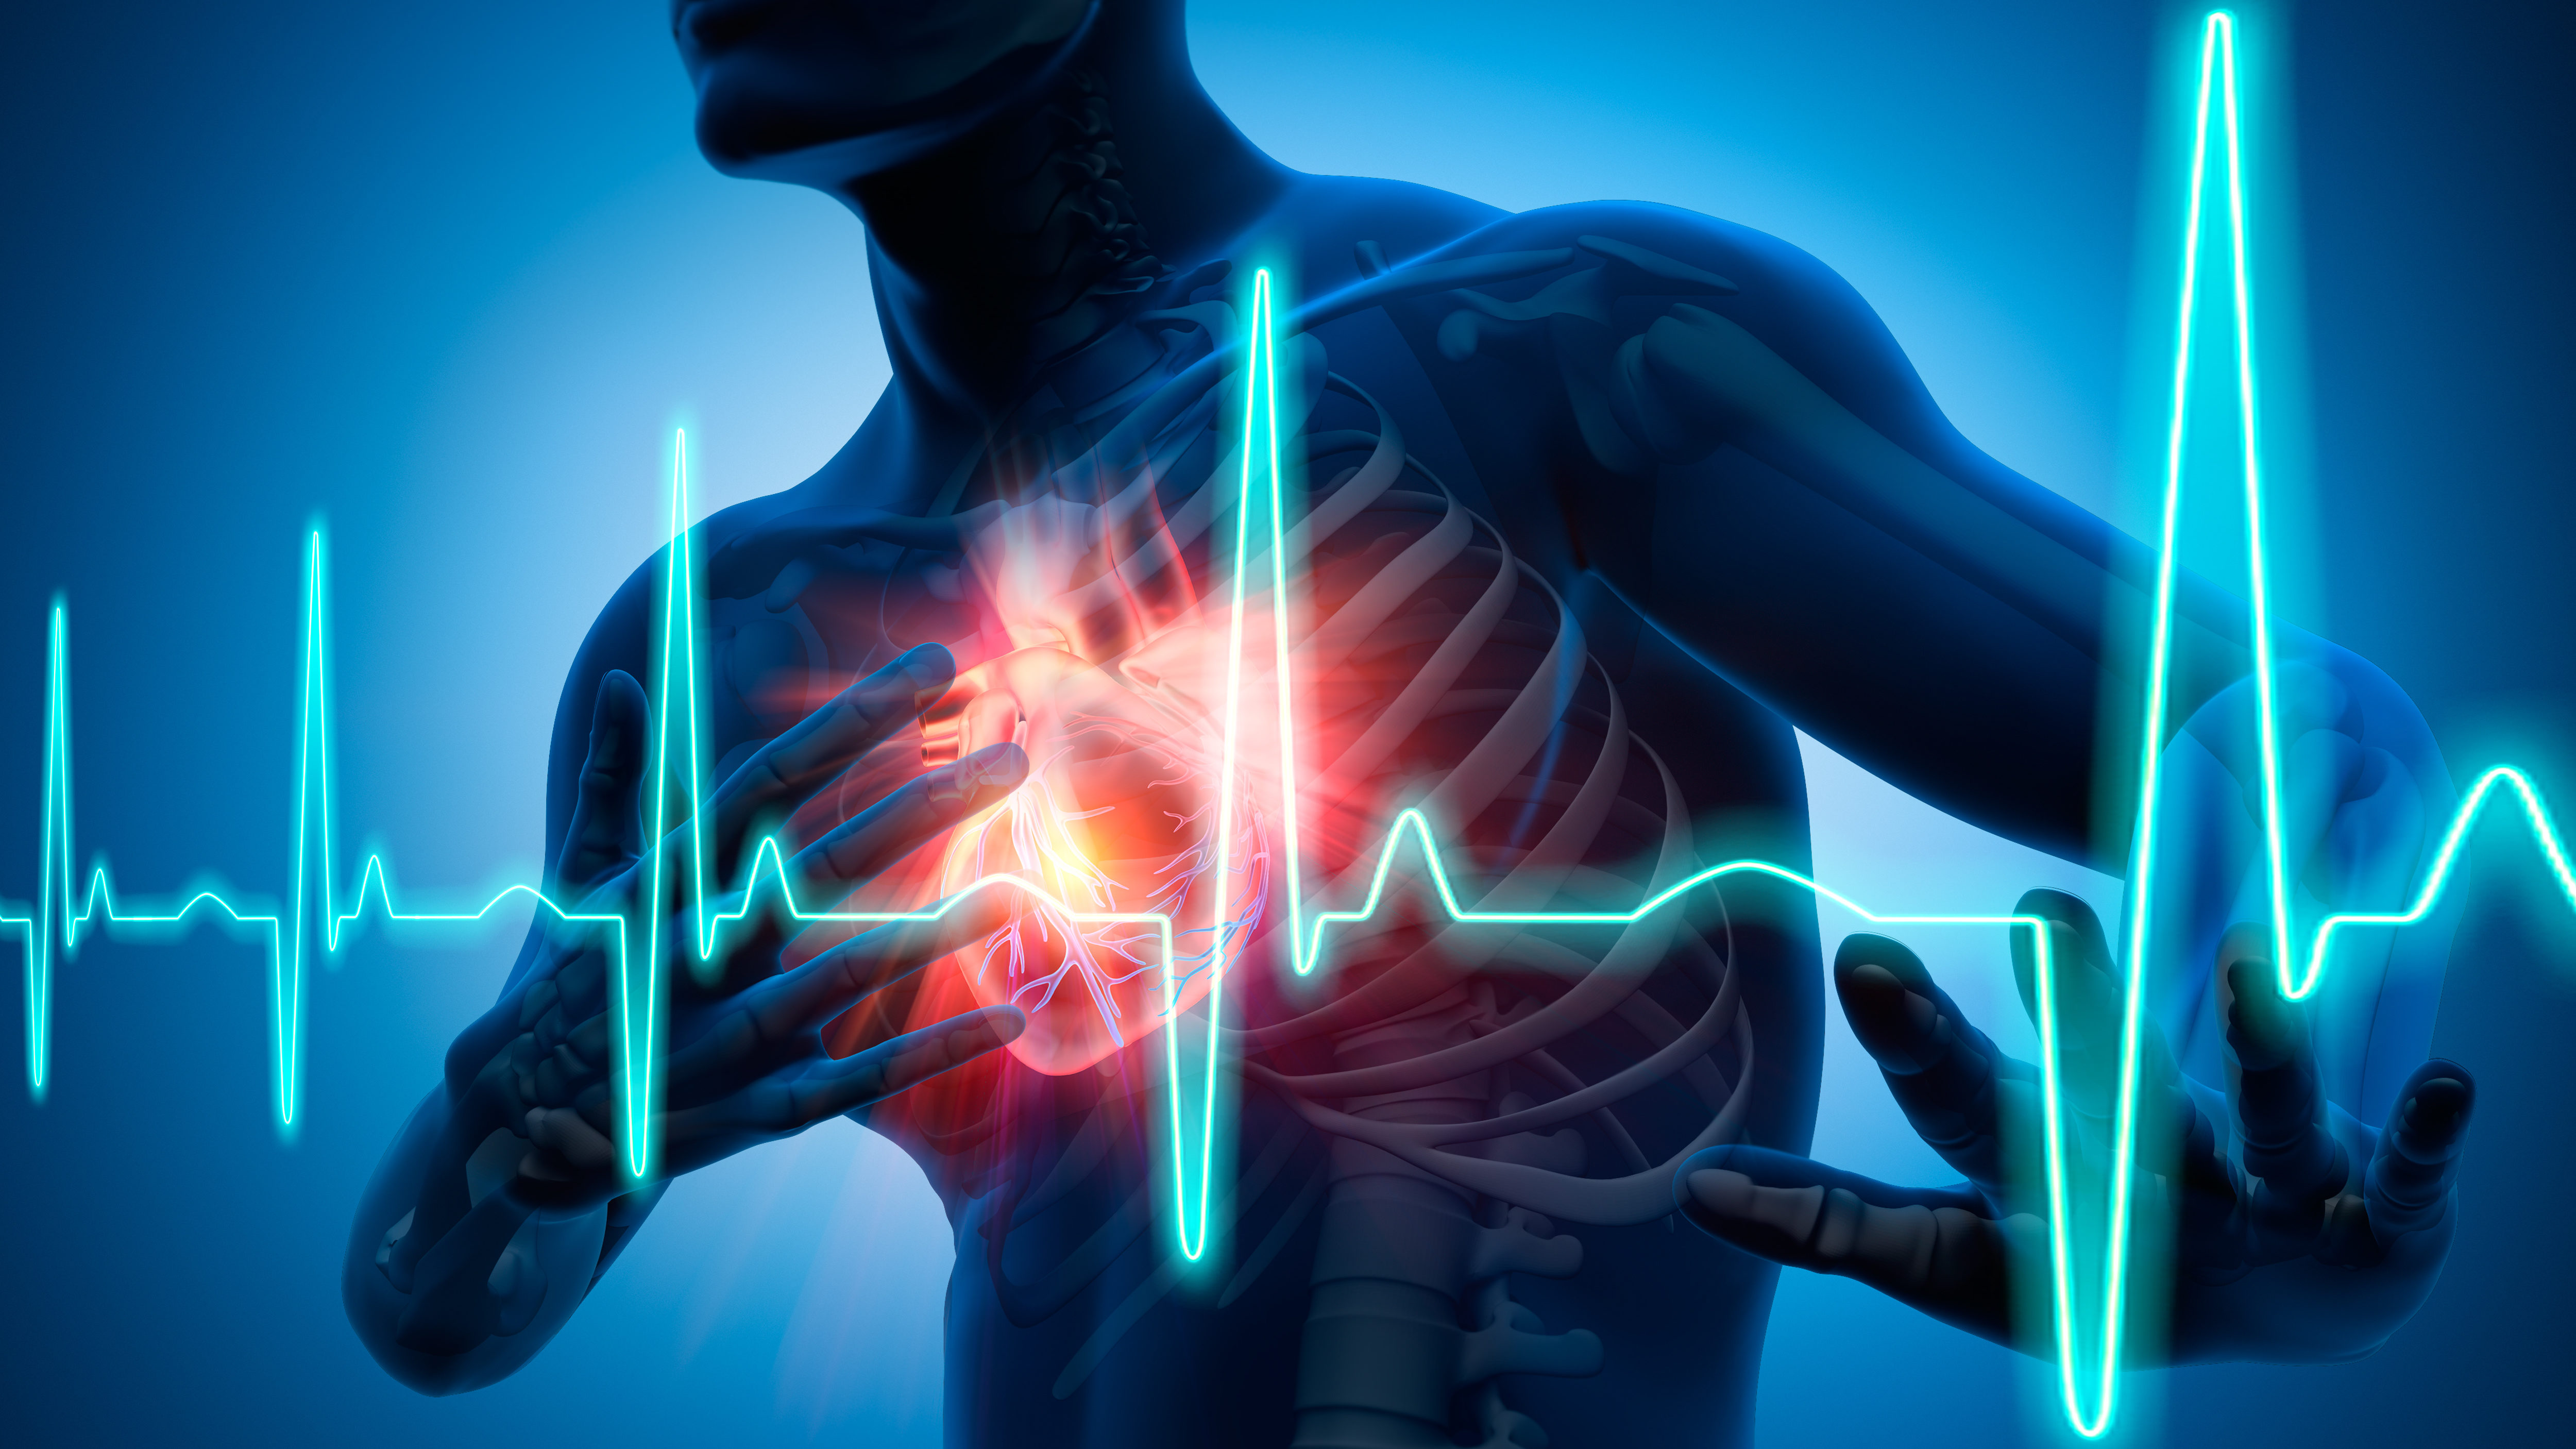

## **Data & Project Understanding**

### **Latar Belakang**

Dataset "Heart Disease Cleveland UCI" berisi informasi tentang karakteristik klinis pasien dan diagnosis mereka terkait penyakit jantung. Masalah kesehatan terkait penyakit jantung adalah masalah serius di seluruh dunia, khususnya di negara Cleveland, Amerika Serikat. Penyakit jantung merupakan penyebab utama kematian di banyak negara. Untuk itu, membangun model machine learning yang dapat memprediksi risiko penyakit jantung berdasarkan karakteristik klinis dapat membantu dalam diagnosis dini dan pencegahan penyakit jantung pada populasi yang rentan. Oleh karena itu, analisis dataset ini dapat membantu dokter, peneliti, dan perusahaan asuransi kesehatan untuk memahami faktor-faktor risiko dan membangun model prediksi untuk membantu memperbaiki kesehatan pasien dan mengurangi risiko kesehatan di masa depan.

### **Tujuan dan Manfaat**

Tujuan dan manfaat dari project ini adalah:
1. Mendeteksi apakah seseorang menderita penyakit jantung atau tidak.
2. Meningkatkan pemahaman tentang karakteristik klinis pasien yang menyebabkan penyakit jantung.
3. Mengidentifikasi faktor-faktor risiko yang menyebabkan penyakit jantung.
4. Membangun model machine learning yang dapat memprediksi risiko penyakit jantung berdasarkan karakteristik klinis dan melakukan perbandingan terhadap algoritma KNN, Logistic Regression, Decision Tree, Random Forest, dan SVM

### **Dataset**

Judul: Heart Disease Cleveland UCI

Source: *Kaggle*

Link: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

### **Content**

There are 14 attributes

1. **age:** age in years

2. **sex:** sex (1 = male; 0 = female)

3. **cp:** chest pain type

  -- Value 0: typical angina

  -- Value 1: atypical angina

  -- Value 2: non-anginal pain

  -- Value 3: asymptomatic

4. **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

5. **chol:** serum cholestoral in mg/dl

6. **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. **restecg:** resting electrocardiographic results

  -- Value 0: normal

  -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

  -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. **thalach:** maximum heart rate achieved

9. **exang:** exercise induced angina (1 = yes; 0 = no)

10. **oldpeak:** ST depression induced by exercise relative to rest

11. **slope:** the slope of the peak exercise ST segment

  -- Value 0: upsloping

  -- Value 1: flat

  -- Value 2: downsloping

12. **ca:** number of major vessels (0-3) colored by flourosopy

13. **thal:** 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

14. **condition:** 0 = no disease, 1 = disease

## **File & Data Info**

### **Upload File & Import Library**

In [ ]:
# Upload File Data Set
from google.colab import files
uploaded = files.upload()

Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Dataset Info**

In [ ]:
# load dataset
path = 'heart_cleveland_upload.csv'
df_heart = pd.read_csv(path)
df_heart.head() # tampilkan 5 data teratas

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

Keterangan:

**age :** usia

**sex :** jenis kelamin (0 = perempuan, 1 = laki-laki)

**cp :** jenis nyeri dada (0 = tipikal angina, 1 = angina tidak stabil, 2 = nyeri tidak angina, 3 = tanpa gejala)

**trestbps :** tekanan darah saat istirahat (dalam mmHg)

**chol :** kadar serum kolesterol dalam mg/dl

**fbs :** kadar gula darah puasa > 120 mg/dl (1 = true, 0 = false)

**restecg :** hasil elektrokardiografi saat istirahat (0 = normal, 1 = ada gangguan gelombang ST-T, 2 = hipertrofi ventrikel kiri)

**thalach :** denyut jantung maksimum yang dicapai selama tes

**exang :** apakah mengalami angina saat berolahraga (1 = yes, 0 = no)

**oldpeak :** penurunan segmen ST yang tercatat selama tes latihan relatif terhadap istirahat

**slope :** kemiringan segmen ST selama latihan (0 = naik, 1 = datar, 2 = turun)

**ca :** jumlah pembuluh darah utama (0-3) yang diwarnai oleh flourosopy

**thal :** jenis thalassemia (0 = normal, 1 = cacat tetapi dapat dibalik, 2 = cacat permanen)

**target/condition :** apakah memiliki penyakit jantung (1 = ya, 0 = tidak)

In [ ]:
# distribusi data
df_heart.describe()

age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.941562    0.469761    1.166123    0.618187    0.938965   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    1.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    3.000000   

             thal   condition  
count  297.000000  297.000000  
mean     0.835017    0.461279  
std      0.956690    0.499340  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      2.000000    1.000000  
max      2.000000    1.000000

In [ ]:
# informasi tipe data di setiap feature
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
# dimensi dataframe
df_heart.shape

(297, 14)

Output diatas menunjukkan bahwa data frame ini memiliki 297 baris dan 14 kolom.

## **Data Cleaning**

### Checking Missing and Null Values

In [ ]:
# mengecek apakah terdapat data kosong
df_heart.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [ ]:
df_heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Dari hasil kode diatas, dapat dilihat bahwa tidak ada data yang memiliki nilai null atau kosong.

### Checking Duplicates

In [ ]:
# mengecek apakah ada data duplikat
df_heart.duplicated().sum()

0

Dari output kode diatas, dapat dilihat bahwa tidak ada data yang duplikat dari dataset.

### Checking Data Types

In [ ]:
# Checking data types
df_heart.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

Dari output kode diatas, dapat dilihat bahwa tipe data atribut berupa integer dan float

### Handling Outliers

In [ ]:
df_heart.describe().T

count        mean        std    min    25%    50%    75%    max
age        297.0   54.542088   9.049736   29.0   48.0   56.0   61.0   77.0
sex        297.0    0.676768   0.468500    0.0    0.0    1.0    1.0    1.0
cp         297.0    2.158249   0.964859    0.0    2.0    2.0    3.0    3.0
trestbps   297.0  131.693603  17.762806   94.0  120.0  130.0  140.0  200.0
chol       297.0  247.350168  51.997583  126.0  211.0  243.0  276.0  564.0
fbs        297.0    0.144781   0.352474    0.0    0.0    0.0    0.0    1.0
restecg    297.0    0.996633   0.994914    0.0    0.0    1.0    2.0    2.0
thalach    297.0  149.599327  22.941562   71.0  133.0  153.0  166.0  202.0
exang      297.0    0.326599   0.469761    0.0    0.0    0.0    1.0    1.0
oldpeak    297.0    1.055556   1.166123    0.0    0.0    0.8    1.6    6.2
slope      297.0    0.602694   0.618187    0.0    0.0    1.0    1.0    2.0
ca         297.0    0.676768   0.938965    0.0    0.0    0.0    1.0    3.0
thal       297.0    0.835017   0.956690    0.0    0.0    0.0    2.0    2.0
condition  297.0    0.461279   0.499340    0.0    0.0    0.0    1.0    1.0

In [ ]:
# deteksi outliers menggunakan Isolation Forest
from sklearn.ensemble import IsolationForest

# Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
yhat = iso.fit_predict(df_heart)

# Print columns with outliers
outlier_cols = df_heart.columns[(yhat == -1).any(axis=0)]
print(f"Columns with outliers: {outlier_cols}")

# Print columns without outliers
non_outlier_cols = df_heart.columns[(yhat != -1).all(axis=0)]
print(f"Columns without outliers: {non_outlier_cols}")

Columns with outliers: [['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
  'oldpeak' 'slope' 'ca' 'thal' 'condition']]
Columns without outliers: []


In [ ]:
# deteksi outliers menggunakan DBScan
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
yhat = dbscan.fit_predict(df_heart)

# Print columns with outliers
outlier_cols = df_heart.columns[(yhat == -1).any(axis=0)]
print(f"Columns with outliers: {outlier_cols}")

# Print columns without outliers
non_outlier_cols = df_heart.columns[(yhat != -1).all(axis=0)]
print(f"Columns without outliers: {non_outlier_cols}")

Columns with outliers: [['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
  'oldpeak' 'slope' 'ca' 'thal' 'condition']]
Columns without outliers: []


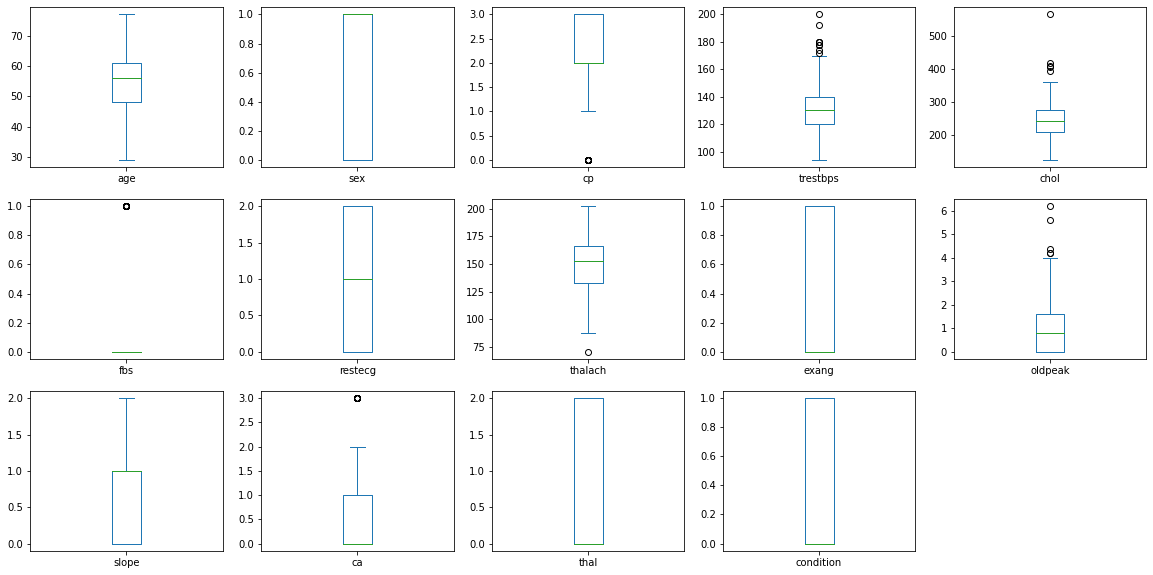

In [ ]:
# deteksi outliers menggunakan boxplot
df_heart.plot(kind='box', layout=(3, 5), figsize=(20,10), subplots=True, sharex=False, sharey=False)
plt.show()

Kita tidak akan melakukan penghilangan outlier pada fitur yang berbentuk categorical seperti cp, fbs, dan ca. Kita hanya melakukan penghilangan outlier pada fitur trestbps, chol, thalach, dan oldpeak.

In [ ]:
df_heart_copy = df_heart.copy()

In [ ]:
px.box(df_heart_copy, x=['trestbps'], title='Sebelum cleaning')

In [ ]:
df_heart = df_heart.drop(df_heart[(df_heart['trestbps']>170)].index)

In [ ]:
px.box(df_heart, x=['trestbps'], title='Setelah cleaning')

In [ ]:
px.box(df_heart_copy, x=['chol'], title='Sebelum cleaning')

In [ ]:
df_heart = df_heart.drop(df_heart[(df_heart['chol']>360)].index)

In [ ]:
px.box(df_heart, x=['chol'], title='Setelah cleaning')

In [ ]:
px.box(df_heart_copy, x=['thalach'], title='Sebelum cleaning')

In [ ]:
df_heart = df_heart.drop(df_heart[(df_heart['thalach']<88)].index)

In [ ]:
px.box(df_heart, x=['thalach'], title='Setelah cleaning')

In [ ]:
px.box(df_heart_copy, x=['oldpeak'], title='Sebelum cleaning')

In [ ]:
df_heart = df_heart.drop(df_heart[(df_heart['oldpeak']>4)].index)

In [ ]:
px.box(df_heart, x=['oldpeak'], title='Setelah cleaning')

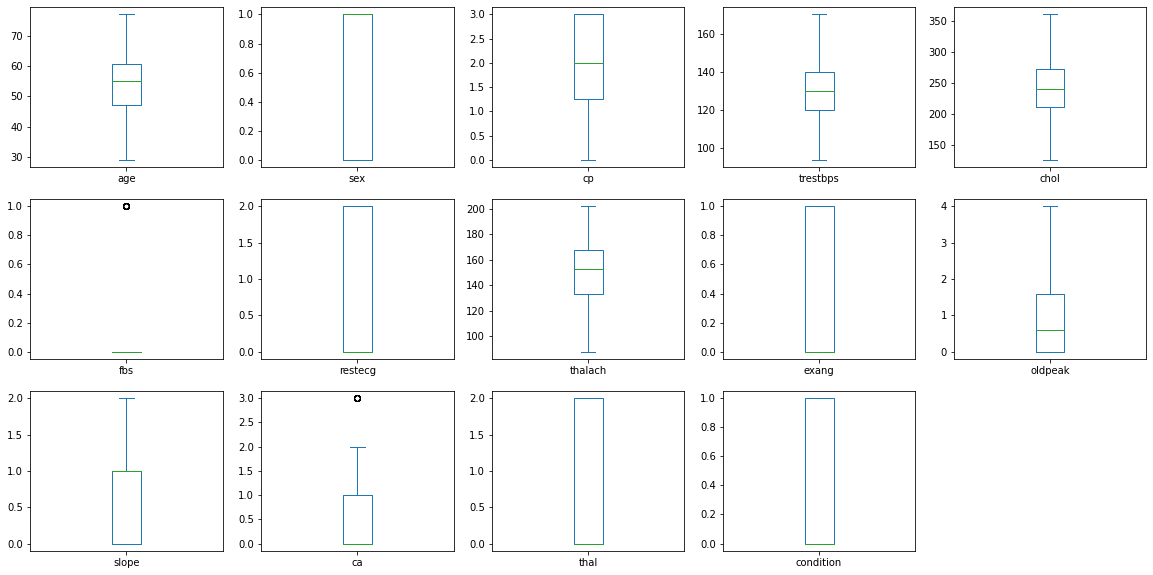

In [ ]:
# perbandingan setelah penghilangan outlier
df_heart.plot(kind='box', layout=(3, 5), figsize=(20,10), subplots=True, sharex=False, sharey=False)
plt.show()

In [ ]:
df_heart.shape

(278, 14)

### Checking Data Distribution

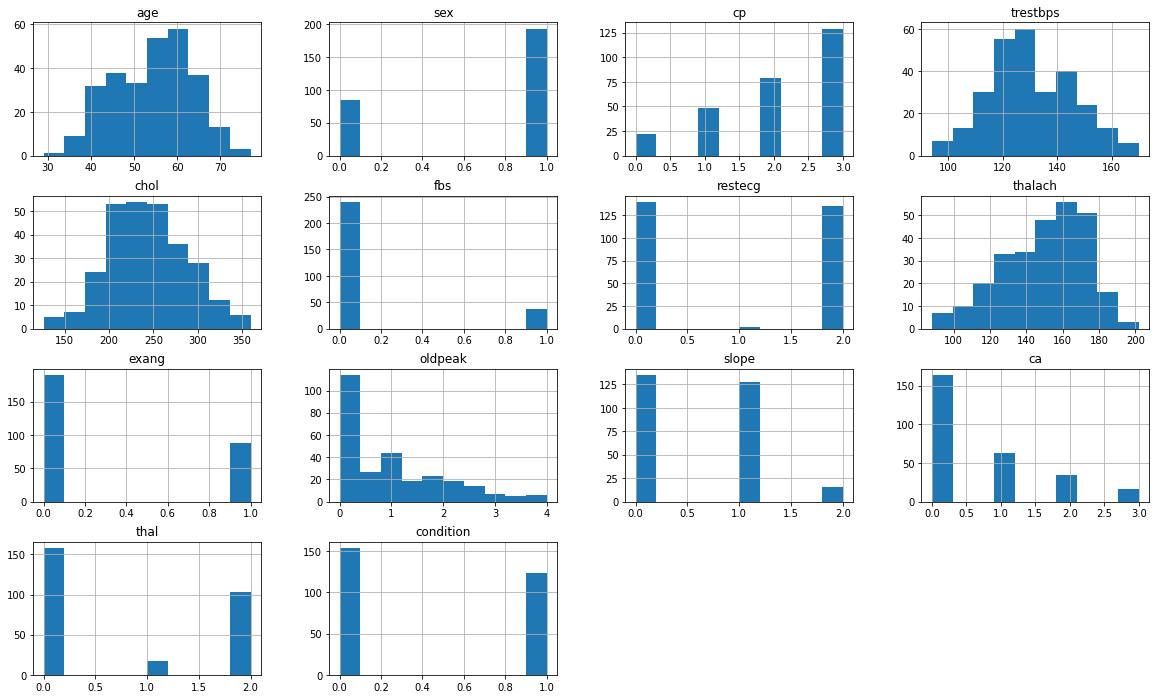

In [ ]:
# distribusi data tiap feature
df_heart.hist(figsize=(20, 12))
plt.show()

## **EDA (Exploratory Data Analysis)**

### Melihat Korelasi antar Fitur

Melihat korelasi menggunakan metode pearson

In [ ]:
# melihat korelasi antar feature
df_heart.corr()

age       sex        cp  trestbps      chol       fbs  \
age        1.000000 -0.061914  0.098931  0.292460  0.166457  0.119911   
sex       -0.061914  1.000000  0.050959 -0.004654 -0.127941  0.059518   
cp         0.098931  0.050959  1.000000 -0.064046  0.054892 -0.065580   
trestbps   0.292460 -0.004654 -0.064046  1.000000  0.126390  0.127722   
chol       0.166457 -0.127941  0.054892  0.126390  1.000000  0.013877   
fbs        0.119911  0.059518 -0.065580  0.127722  0.013877  1.000000   
restecg    0.143977  0.060945  0.084110  0.158564  0.123700  0.068809   
thalach   -0.410591 -0.058159 -0.330965 -0.072819 -0.013934 -0.024462   
exang      0.097351  0.183072  0.370101 -0.001276  0.070748 -0.023161   
oldpeak    0.199920  0.166299  0.192125  0.141301 -0.023374  0.019142   
slope      0.144333  0.060060  0.135373  0.080870 -0.049958  0.057008   
ca         0.387391  0.131930  0.220829  0.097997  0.112469  0.164456   
thal       0.116218  0.404837  0.287475  0.084329 -0.004560  0.027797   
condition  0.228983  0.312778  0.400245  0.125136  0.105708  0.001061   

            restecg   thalach     exang   oldpeak     slope        ca  \
age        0.143977 -0.410591  0.097351  0.199920  0.144333  0.387391   
sex        0.060945 -0.058159  0.183072  0.166299  0.060060  0.131930   
cp         0.084110 -0.330965  0.370101  0.192125  0.135373  0.220829   
trestbps   0.158564 -0.072819 -0.001276  0.141301  0.080870  0.097997   
chol       0.123700 -0.013934  0.070748 -0.023374 -0.049958  0.112469   
fbs        0.068809 -0.024462 -0.023161  0.019142  0.057008  0.164456   
restecg    1.000000 -0.104397  0.110740  0.100569  0.128112  0.121705   
thalach   -0.104397  1.000000 -0.395419 -0.347443 -0.381355 -0.301245   
exang      0.110740 -0.395419  1.000000  0.321733  0.253545  0.159330   
oldpeak    0.100569 -0.347443  0.321733  1.000000  0.527910  0.239461   
slope      0.128112 -0.381355  0.253545  0.527910  1.000000  0.069199   
ca         0.121705 -0.301245  0.159330  0.239461  0.069199  1.000000   
thal      -0.006819 -0.292858  0.337627  0.310033  0.236769  0.224761   
condition  0.180018 -0.426779  0.416150  0.428431  0.314566  0.456441   

               thal  condition  
age        0.116218   0.228983  
sex        0.404837   0.312778  
cp         0.287475   0.400245  
trestbps   0.084329   0.125136  
chol      -0.004560   0.105708  
fbs        0.027797   0.001061  
restecg   -0.006819   0.180018  
thalach   -0.292858  -0.426779  
exang      0.337627   0.416150  
oldpeak    0.310033   0.428431  
slope      0.236769   0.314566  
ca         0.224761   0.456441  
thal       1.000000   0.530475  
condition  0.530475   1.000000

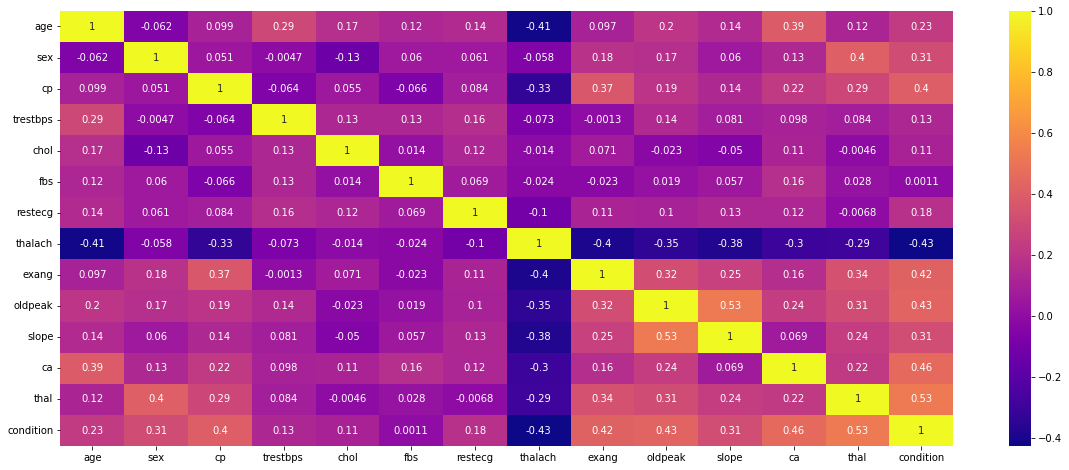

In [ ]:
# visualisasi korelasi
plt.figure(figsize=(20,8))
sns.heatmap(df_heart.corr(), annot=True, cmap=plt.cm.plasma)
plt.show()

Melihat korelasi menggunakan metode spearman

In [ ]:
df_heart.corr(method='spearman')

age       sex        cp  trestbps      chol       fbs  \
age        1.000000 -0.060359  0.123947  0.294127  0.164369  0.114770   
sex       -0.060359  1.000000  0.085508 -0.021079 -0.118114  0.059518   
cp         0.123947  0.085508  1.000000 -0.021105  0.058943 -0.066391   
trestbps   0.294127 -0.021079 -0.021105  1.000000  0.121332  0.121659   
chol       0.164369 -0.118114  0.058943  0.121332  1.000000  0.018007   
fbs        0.114770  0.059518 -0.066391  0.121659  0.018007  1.000000   
restecg    0.142779  0.060789  0.113669  0.149098  0.140125  0.068767   
thalach   -0.412777 -0.057848 -0.368578 -0.045898 -0.030797 -0.024078   
exang      0.093973  0.183072  0.416627  0.008217  0.071990 -0.023161   
oldpeak    0.251329  0.146079  0.230876  0.138897 -0.014466  0.021621   
slope      0.158699  0.053855  0.181868  0.064870 -0.028077  0.038243   
ca         0.411340  0.138169  0.255853  0.072072  0.129527  0.145001   
thal       0.128300  0.409800  0.332528  0.079718 -0.005499  0.033186   
condition  0.247646  0.312778  0.455191  0.110307  0.114886  0.001061   

            restecg   thalach     exang   oldpeak     slope        ca  \
age        0.142779 -0.412777  0.093973  0.251329  0.158699  0.411340   
sex        0.060789 -0.057848  0.183072  0.146079  0.053855  0.138169   
cp         0.113669 -0.368578  0.416627  0.230876  0.181868  0.255853   
trestbps   0.149098 -0.045898  0.008217  0.138897  0.064870  0.072072   
chol       0.140125 -0.030797  0.071990 -0.014466 -0.028077  0.129527   
fbs        0.068767 -0.024078 -0.023161  0.021621  0.038243  0.145001   
restecg    1.000000 -0.125533  0.110780  0.085524  0.134530  0.116971   
thalach   -0.125533  1.000000 -0.404618 -0.424668 -0.425500 -0.313773   
exang      0.110780 -0.404618  1.000000  0.307867  0.266887  0.195423   
oldpeak    0.085524 -0.424668  0.307867  1.000000  0.567038  0.247713   
slope      0.134530 -0.425500  0.266887  0.567038  1.000000  0.100735   
ca         0.116971 -0.313773  0.195423  0.247713  0.100735  1.000000   
thal      -0.004480 -0.315545  0.340379  0.336215  0.265090  0.244425   
condition  0.180029 -0.427943  0.416150  0.406004  0.341397  0.490471   

               thal  condition  
age        0.128300   0.247646  
sex        0.409800   0.312778  
cp         0.332528   0.455191  
trestbps   0.079718   0.110307  
chol      -0.005499   0.114886  
fbs        0.033186   0.001061  
restecg   -0.004480   0.180029  
thalach   -0.315545  -0.427943  
exang      0.340379   0.416150  
oldpeak    0.336215   0.406004  
slope      0.265090   0.341397  
ca         0.244425   0.490471  
thal       1.000000   0.533411  
condition  0.533411   1.000000

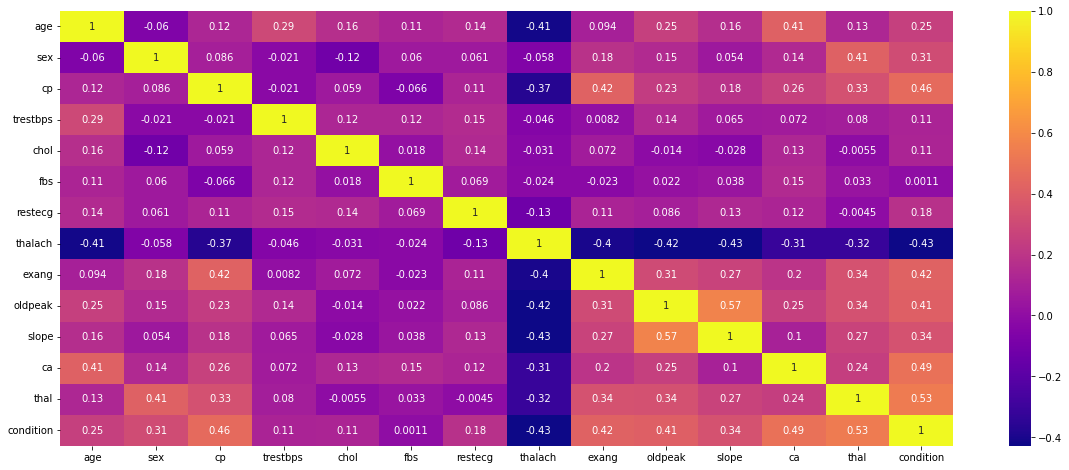

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df_heart.corr(method='spearman'), annot=True, cmap=plt.cm.plasma)
plt.show()

Dari visualisasi heatmap diatas. Dapat disimpulkan bahwa fitur-fitur yang memiliki korelasi diatas 0.35 dapat kita anggap sebagai fitur yang berkorelasi tinggi. Diantaranya adalah:

1. Age dan ca
2. Sex dan thal
3. cp dan exang
4. cp dan condition
5. exang dan condition
6. oldpeak dan slope
7. oldpeak dan condition
8. ca da condition
9. thal dan condition

### Observasi Fitur yang Berkorelasi dengan Fitur Condition

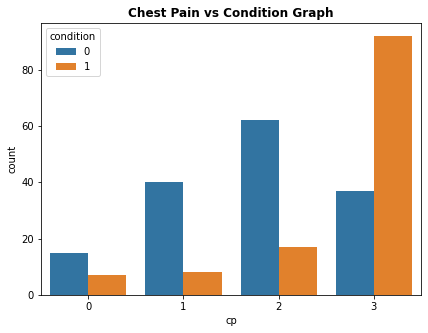

In [ ]:
# korelasi cp vs condition
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(x=df_heart['cp'], hue=df_heart['condition'])
plt.title('Chest Pain vs Condition Graph', fontweight='bold')
plt.show()

Dari grafik diatas, dapat dilihat bahwa orang yang memiliki chest pain type 3 memiliki kemungkinan besar terkena penyakit jantung.

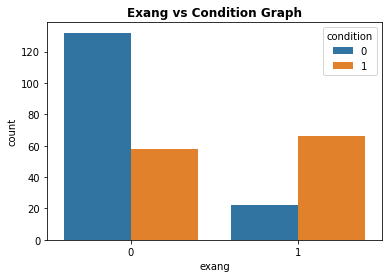

In [ ]:
# korelasi exang vs condition
sns.countplot(x=df_heart['exang'], hue=df_heart['condition'])
plt.title('Exang vs Condition Graph', fontweight='bold')
plt.show()

Dari grafik diatas, dapat dilihat bahwa orang yang tidak memiliki exercise induced angina memiliki kemungkinan yang lebh kecil untuk terkena penyakit jantung.

<Figure size 720x1440 with 0 Axes>

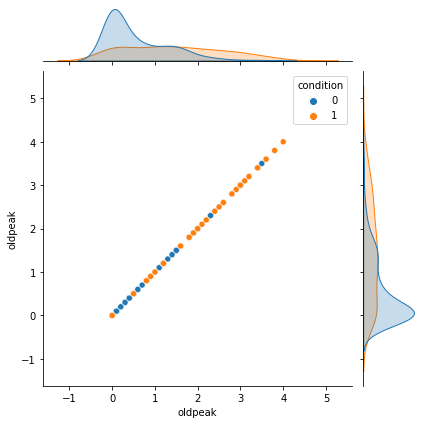

In [ ]:
# korelasi oldpeak vs condition
plt.figure(figsize=(10,20))
sns.jointplot(data=df_heart, x='oldpeak',y='oldpeak', hue='condition')
plt.show()

Dari grafik diatas, orang yang memiliki oldpeak lebih dari 2 memiliki kemungkinan lebih besar untuk terkena penyakit jantung.

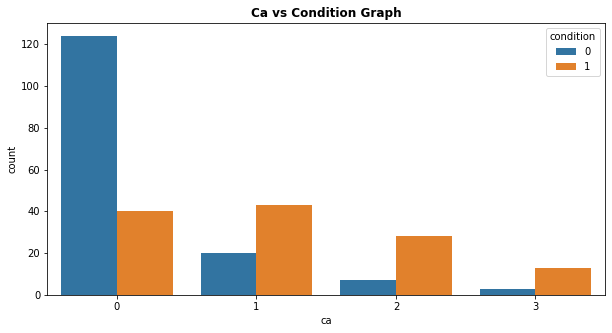

In [ ]:
# korelasi ca vs condition
plt.figure(figsize=(10,5))
sns.countplot(x=df_heart['ca'], hue=df_heart['condition'])
plt.title('Ca vs Condition Graph', fontweight='bold')
plt.show()

Dari grafik diatas, dapat dilihat bahwa orang yang memiliki ca dengan nilai 0 memiliki kemungkinan lebih kecil untuk terkena penyakit jantung, sementara orang yang memiliki ca dengan nilai 3 memiliki kemungkinan yang besar untuk terkena penyakit jantung.

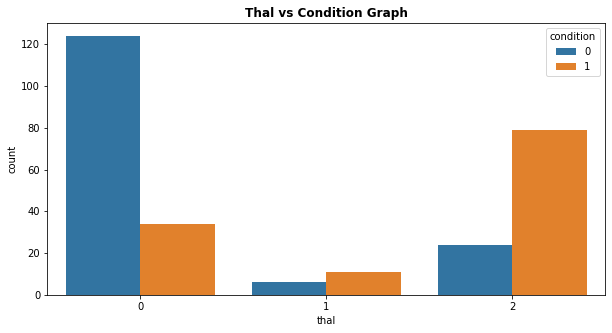

In [ ]:
# korelasi thal vs condition
plt.figure(figsize=(10,5))
sns.countplot(x=df_heart['thal'], hue=df_heart['condition'])
plt.title('Thal vs Condition Graph', fontweight='bold')
plt.show()

Dari grafik diatas, dapat dilihat bahwa orang yang memiliki thalassemia normal (0) memiliki kemungkinan yang kecil untuk terkena penyakit jantung, sementara orang yang memiliki thalassemia reversable defect (2) memiliki kemungkinan terbesar untuk terkena penyakit jantung.

### Bagaimana distribusi nilai pada kolom 'cp' atau chest pain type?

Chest Pain Type Total


3    129
2     79
1     48
0     22
Name: cp, dtype: int64

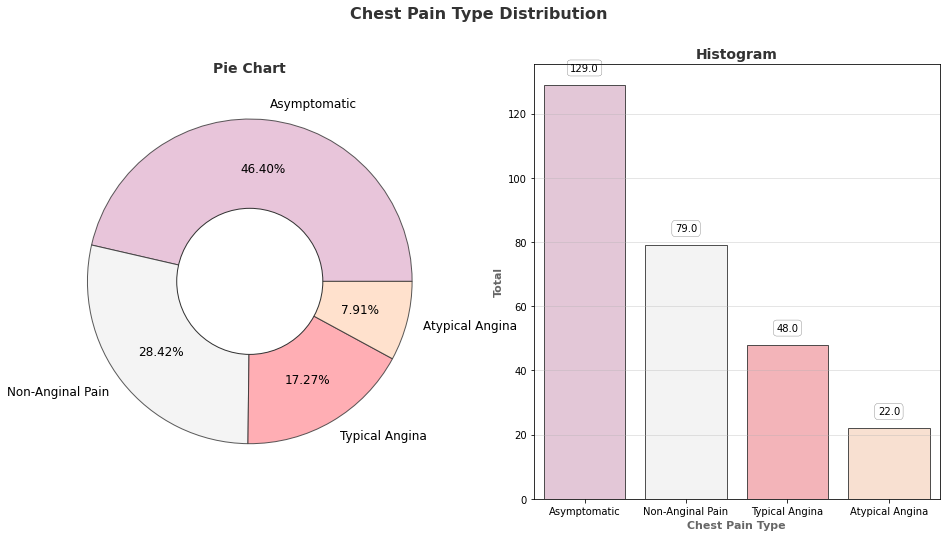

In [ ]:
# Setting Colors, Labels, Order
colors = ['#E3B7D1', '#F2F2F2', '#FF9AA2', '#FFDAC1']
labels = ['Asymptomatic', 'Non-Anginal Pain', 'Typical Angina', 'Atypical Angina', ]
order = df_heart['cp'].value_counts().index

# Size for Both Figures
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif', color='#333333')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='#333333')
plt.pie(df_heart['cp'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor='#333333'))
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#333333')
plt.gcf().gca().add_artist(centre)

# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='#333333')
ax = sns.countplot(x='cp', data=df_heart, palette=colors, order=order,
                   edgecolor='#333333', alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2,
            rect.get_height()+4.25,rect.get_height(),
            horizontalalignment='center', fontsize=10,
            bbox=dict(facecolor='none', edgecolor='#333333', linewidth=0.25,
                      boxstyle='round'))

plt.xlabel('Chest Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color='#666666')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color='#666666')
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

print('Chest Pain Type Total')
df_heart.cp.value_counts()

Dari output diatas dapat dilihat bahwa jenis nyeri dada 3 (asymptomatic) memiliki jumlah tertinggi dibandingkan dengan jenis nyeri dada lainnya.

### Bagaimana distribusi nilai pada kolom 'exang' atau exercise induced angina?

Exercise Induced Angina Total


0    190
1     88
Name: exang, dtype: int64

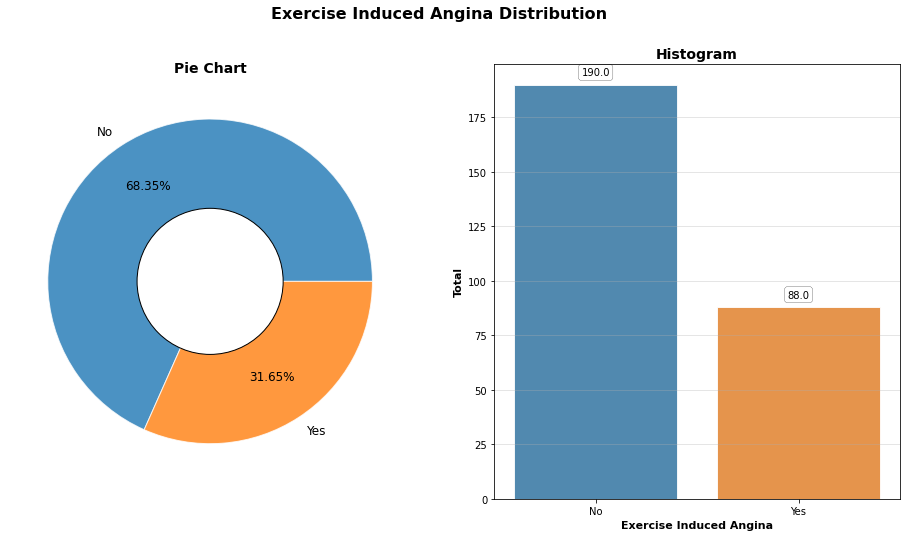

In [ ]:
# Setting Colors, Labels, Order
colors=['tab:blue', 'tab:orange']
labels=['No', 'Yes']
order=df_heart['exang'].value_counts().index

# Size for Both Figures
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif')

# Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df_heart['exang'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor='w'), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)

# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='exang', data=df_heart, palette=colors, order=order,
                   edgecolor='w', alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor='k', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

print('Exercise Induced Angina Total')
df_heart.exang.value_counts()

Dari output diatas dapat dilihat bahwa pasien dengan no exercise induced angina adalah yang tertinggi dibandingkan dengan pasien dengan exercise induced angina.

### Bagaimana distribusi nilai pada kolom 'ca' atau number of major vessels?

Number of Major Vessels Total
0    164
1     63
2     35
3     16
Name: ca, dtype: int64


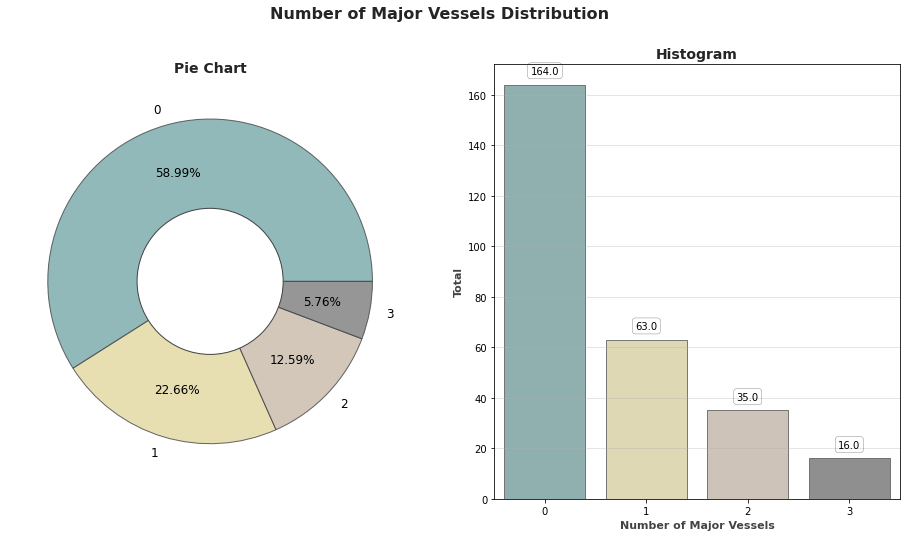

In [ ]:
# Define colors
natural_colors = ['#77A8A8', '#E1D89F', '#C9B9A8', '#7C7C7C']
black_grad = ['#232526', '#414345', '#646464', '#BFBFBF', '#F1F1F2']

# Define the labels, colors, and order
labels = ['0', '1', '2', '3']
colors = natural_colors
order = df_heart['ca'].value_counts().index

# Set the figure size and title
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# Pie chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df_heart['ca'].value_counts(), labels=labels[:df_heart['ca'].nunique()], colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
ax = sns.countplot(x='ca', data=df_heart, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, rect.get_height(),
            horizontalalignment='center', fontsize=10,
            bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                      boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

print('Number of Major Vessels Total')
print(df_heart['ca'].value_counts())

Dari output diatas dapat dilihat bahwa orang dengan pembuluh darah utama 0 memiliki distribusi tertinggi dibandingkan dengan yang lain.

### Bagaimana distribusi nilai pada kolom 'thal' atau jenis thalassemia?

"thal" Total
0    158
2    103
1     17
Name: thal, dtype: int64


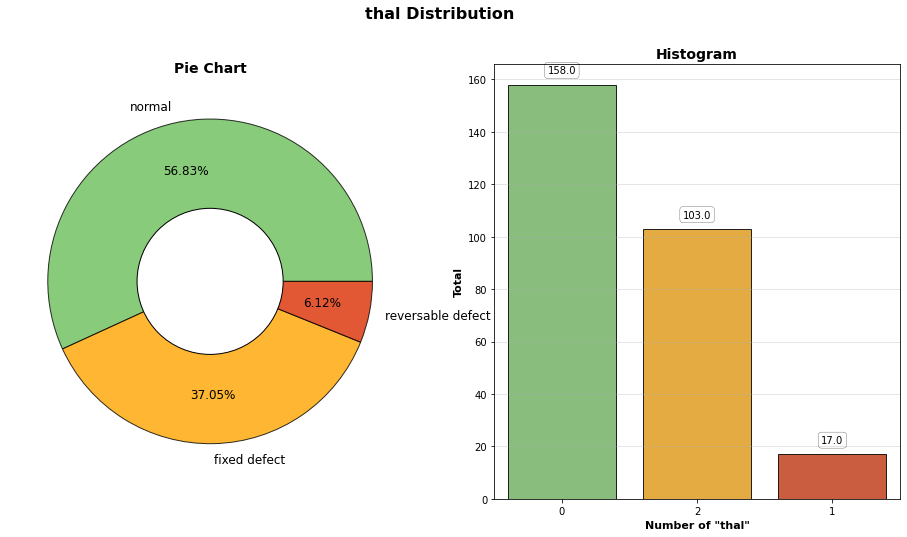

In [ ]:
# Define the colors, labels, and order
colors = ['#6bbf59', '#ffa600', '#dc2f02']
labels = ['normal', 'fixed defect', 'reversable defect']
order = df_heart['thal'].value_counts().index

# Set the figure size and title
plt.figure(figsize=(16, 8))
plt.suptitle('thal Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif', color='black')

# Plot the pie chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='black')
plt.pie(df_heart['thal'].value_counts(), labels=labels[:df_heart['thal'].nunique()], colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor='black'),
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)

# Plot the histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='black')
ax = sns.countplot(x='thal', data=df_heart, palette=colors, order=order,
                   edgecolor='black', alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, rect.get_height(),
            horizontalalignment='center', fontsize=10,
            bbox=dict(facecolor='none', edgecolor='black', linewidth=0.25,
                      boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color='black')
plt.grid(axis='y', alpha=0.4)
countplt

print('"thal" Total')
print(df_heart['thal'].value_counts())

Dari output diatas dapat dilihat bahwa pasien dengan "thal" 0 (normal) memiliki distribusi tertinggi dibandingkan dengan yang lain

### Bagaimana distribusi nilai pada kolom 'sex'?

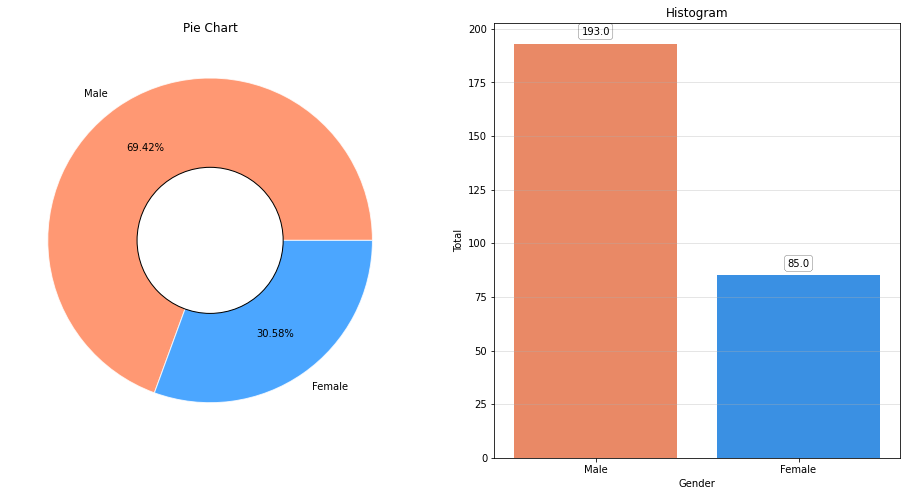

Sex Total
1    193
0     85
Name: sex, dtype: int64


In [ ]:
# Define colors, labels, and order
colors = ['#FF7F50', '#1E90FF']
labels = ['Male', 'Female']
order = df_heart['sex'].value_counts().index

# Set figure size
plt.figure(figsize=(16, 8))

# Create pie chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df_heart['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='white'))
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)

# Create histogram
plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='sex', data=df_heart, palette=colors, order=order)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 4.25, rect.get_height(),
            horizontalalignment='center', fontsize=10,
            bbox=dict(facecolor='none', edgecolor='black', linewidth=0.25, boxstyle='round'))
plt.xlabel('Gender')
plt.ylabel('Total')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

# Show plot
plt.show()

# Print sex value counts
print('Sex Total')
print(df_heart.sex.value_counts())

Dari output diatas dapat dilihat bahwa distribusi pasien pria lebih banyak dibandingkan dengan pasien wanita.

### Bagaimana distribusi nilai pada kolom 'fbs' atau fasting blood sugar?

Fasting Blood Sugar Total


0    240
1     38
Name: fbs, dtype: int64

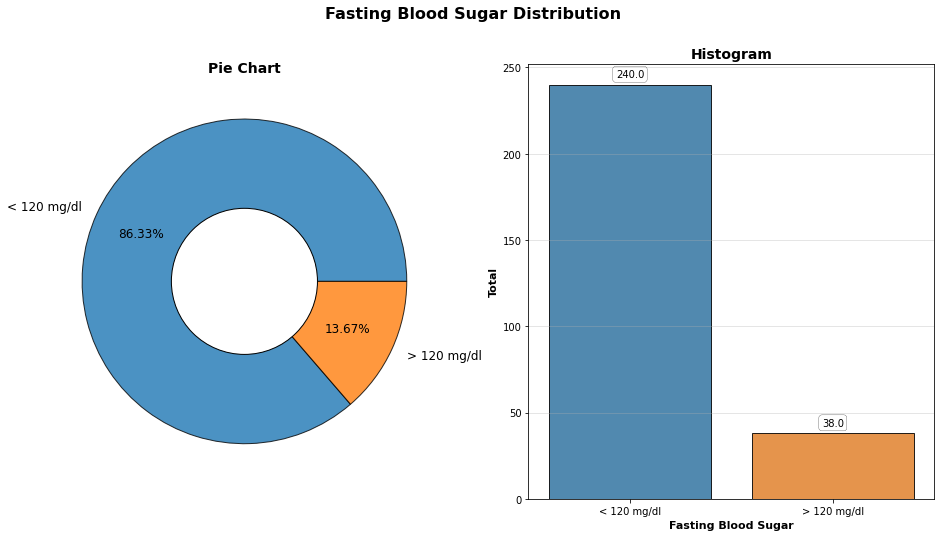

In [ ]:
# Setting Colors, Labels, Order
colors = ['#1f77b4', '#ff7f0e']
labels = ['< 120 mg/dl', '> 120 mg/dl']
order = df_heart['fbs'].value_counts().index

# Size for Both Figures
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif', color='black')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='black')
plt.pie(df_heart['fbs'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor='black'), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)

# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='black')
ax = sns.countplot(x='fbs', data=df_heart, palette=colors, order=order,
                   edgecolor='black', alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor='black', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color='black')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

print('Fasting Blood Sugar Total')
df_heart.fbs.value_counts()

Dari output diatas dapat dilihat bahwa jumlah pasien dengan gula darah puasa kurang dari 120 mg/dl memiliki jumlah tertinggi.

### Bagaimana distribusi nilai pada kolom 'restecg' atau resting electrocardiographic?

Resting Electrocardiographic Total


0    140
2    136
1      2
Name: restecg, dtype: int64

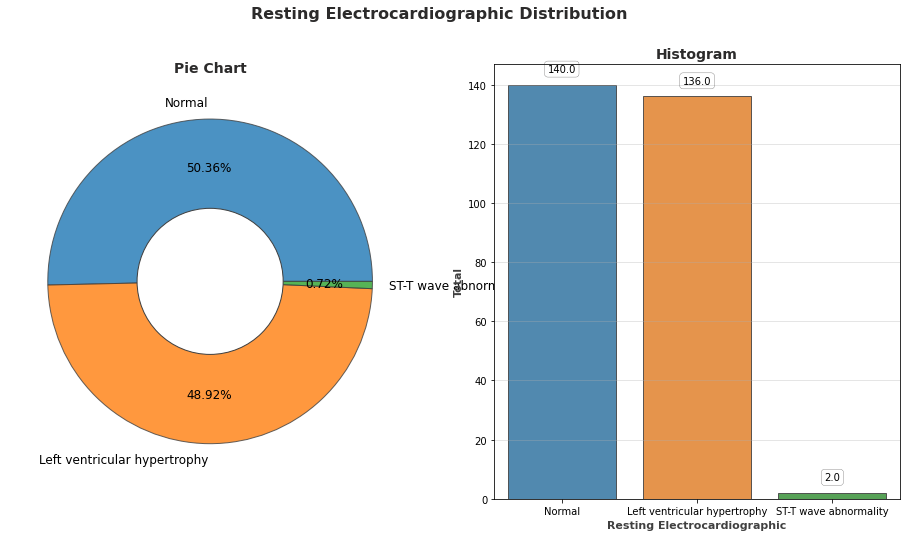

In [ ]:
# Setting Colors, Labels, Order
colors=['#1f77b4', '#ff7f0e', '#2ca02c']
labels=['Normal', 'Left ventricular hypertrophy', 'ST-T wave abnormality']
order=df_heart['restecg'].value_counts().index

# Size for Both Figures
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif', color='#2C2B2B')

# Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='#2C2B2B')
plt.pie(df_heart['restecg'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor='#404040'), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='#404040')
plt.gcf().gca().add_artist(centre)

# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='#2C2B2B')
ax = sns.countplot(x='restecg', data=df_heart, palette=colors, order=order,
                   edgecolor='#404040', alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor='#2C2B2B', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', color='#404040')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color='#404040')
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

print('Resting Electrocardiographic Total')
df_heart.restecg.value_counts()

Dari output diatas dapat dilihat bahwa Resting Electrocardiographic dengan hasil 0 (normal) dan 2 (hipertrofi ventrikel kiri) memiliki distribusi yang lebih tinggi dibandingkan dengan hasil 1 (ada gangguan gelombang).
Selain itu, hasil 0 (normal) memiliki distribusi tertinggi dibandingkan dengan hasil lainnya.

### Bagaimana distribusi nilai pada kolom 'slope' atau slope of the peak exercise?

Slope Total


0    135
1    127
2     16
Name: slope, dtype: int64

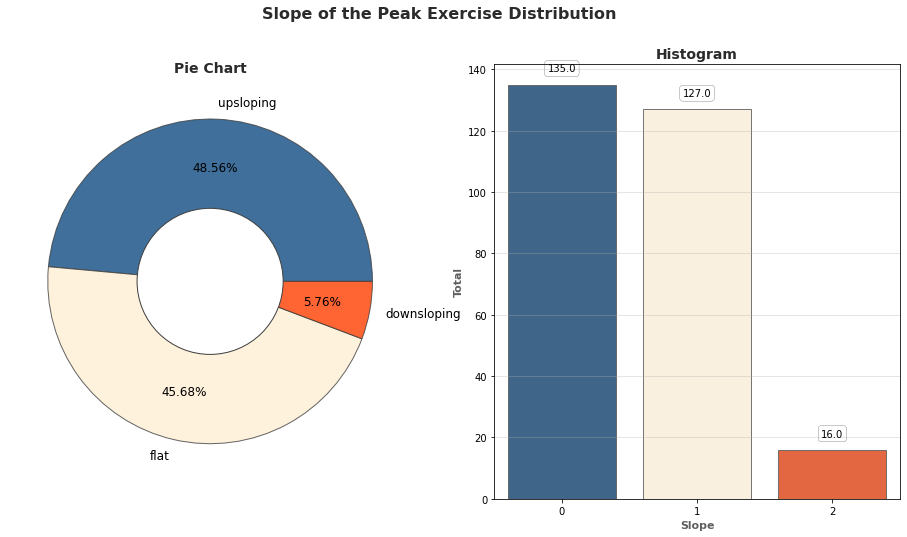

In [ ]:
# Setting Colors, Labels, Order
colors = ['#0F4C81', '#FFEFD5', '#FF3E00', '#FFA07A']
labels = ['upsloping', 'flat', 'downsloping']
order = df_heart['slope'].value_counts().index

# Size for Both Figures
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif', color='#2C2B2B')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#2C2B2B')
plt.pie(df_heart['slope'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor='#404040'), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='#404040')
plt.gcf().gca().add_artist(centre)

# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='#2C2B2B')
ax = sns.countplot(x='slope', data=df_heart, palette=colors, order=order,
                   edgecolor='#5F5F5F', alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor='#2C2B2B', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color='#5F5F5F')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color='#5F5F5F')
plt.grid(axis='y', alpha=0.4)
countplt

print('Slope Total')
df_heart.slope.value_counts()


Dari output diatas dapat dilihat bahwa distribusi slope 0 (upsloping) dan 1 (flat) hampir sama. Selain itu, slope 0 (upsloping) memiliki distribusi tertinggi dibandingkan dengan yang lain.

### Bagaimana distribusi nilai pada kolom 'condition' atau target?

"condition" Total
0    154
1    124
Name: condition, dtype: int64


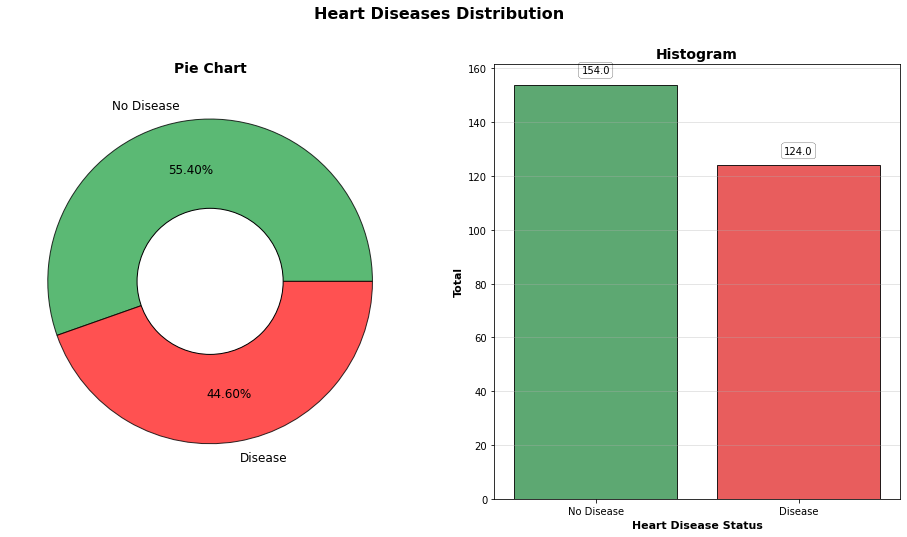

In [ ]:
# Define the colors, labels, and order
colors = ['#32a852', '#ff2626']
labels = ['No Disease', 'Disease']
order = df_heart['condition'].value_counts().index

# Set the figure size and title
plt.figure(figsize=(16, 8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif', color='black')

# Plot the pie chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='black')
plt.pie(df_heart['condition'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor='black'),
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize': 12})
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)

# Plot the histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color='black')
ax = sns.countplot(x='condition', data=df_heart, palette=colors, order=order,
                   edgecolor='black', alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, rect.get_height(),
            horizontalalignment='center', fontsize=10,
            bbox=dict(facecolor='none', edgecolor='black', linewidth=0.25,
                      boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11,
           fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color='black')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

print('"condition" Total')
print(df_heart['condition'].value_counts())

Dari output diatas dapat dilihat bahwa jumlah total pasien yang tidak memiliki penyakit jantung lebih tinggi dibandingkan dengan pasien yang memiliki penyakit jantung.

### Bagaimana distribusi nilai pada kolom 'age' atau umur pasien?

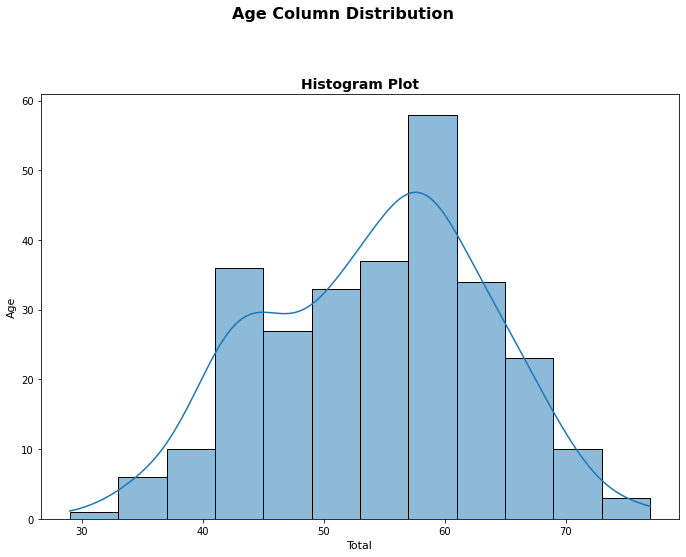

In [ ]:
# Variable, Color & Plot Size
var = 'age'
color = sns.color_palette()[0]
fig = plt.figure(figsize=(6, 6))

# General Title
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16,
             fontfamily='sans-serif', color='black')
fig.subplots_adjust(top=0.85)

# Histogram
ax_1 = fig.add_subplot(2, 1, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='black')
sns.histplot(data=df_heart, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color='black')
plt.ylabel('Age', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color='black')

# Centering the title and the histogram
fig.tight_layout(pad=-12)

Dari grafik histogram ini, dapat dilihat bahwa distribusi umur dalam dataset cenderung condong ke kanan, artinya ada lebih banyak orang yang berusia di bawah 60 tahun dalam dataset. Selain itu, kita juga dapat melihat bahwa puncak terbesar terdapat di rentang usia antara 50 dan 60 tahun.

### Bagaimana distribusi nilai pada kolom 'trestbps' atau resting blood pressure?

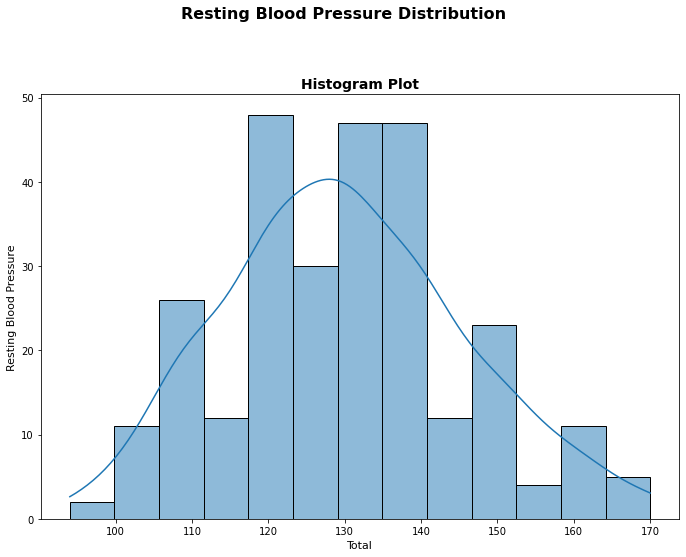

In [ ]:
# Variable, Color & Plot Size
var = 'trestbps'
color = sns.color_palette()[0]
fig = plt.figure(figsize=(6, 6))

# General Title
fig.suptitle('Resting Blood Pressure Distribution', fontweight='bold', fontsize=16,
             fontfamily='sans-serif', color='black')
fig.subplots_adjust(top=0.85)

# Histogram
ax_1 = fig.add_subplot(2, 1, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='black')
sns.histplot(data=df_heart, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color='black')
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color='black')

# Centering the title and the histogram
fig.tight_layout(pad=-12)

### Bagaimana distribusi nilai pada kolom 'chol' atau serum cholesterol?

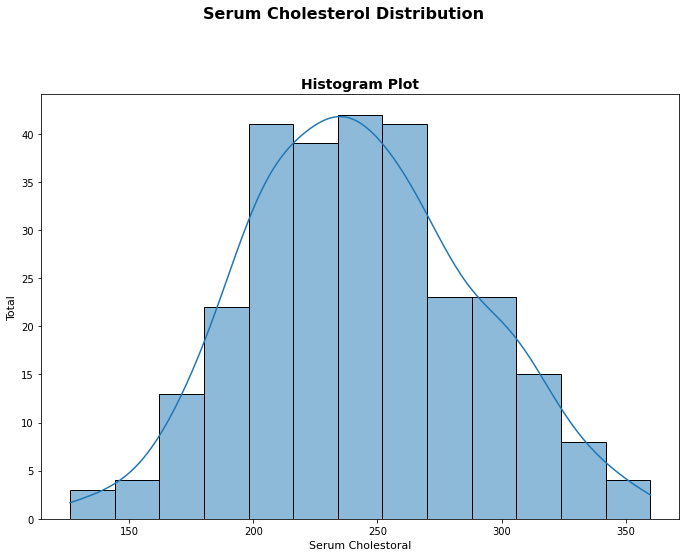

In [ ]:
# Variable, Color & Plot Size
var = 'chol'
color = sns.color_palette()[0]
fig = plt.figure(figsize=(6, 6))

# General Title
fig.suptitle('Serum Cholesterol Distribution', fontweight='bold', fontsize=16,
             fontfamily='sans-serif', color='black')
fig.subplots_adjust(top=0.85)

# Histogram
ax_1 = fig.add_subplot(2, 1, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='black')
sns.histplot(data=df_heart, x=var, kde=True, color=color)
plt.xlabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color='black')

# Centering the title and the histogram
fig.tight_layout(pad=-12)

Grafik histogram di atas dapat dilihat bahwa mayoritas data serum cholesterol terkonsentrasi pada rentang antara 200-300 mg/dL

### Bagaimana distribusi nilai pada kolom 'thalach' atau denyut jantung maksimum?

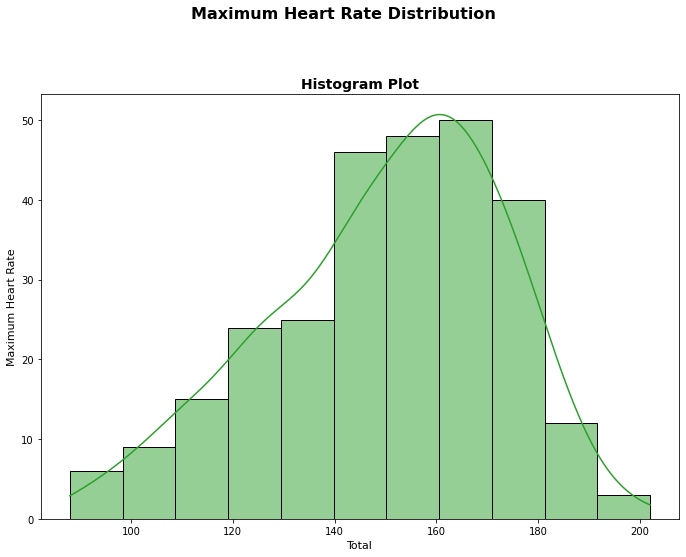

In [ ]:
# Variable, Color & Plot Size
var = 'thalach'
color = sns.color_palette()[2]
fig = plt.figure(figsize=(6, 6))

# General Title
fig.suptitle('Maximum Heart Rate Distribution', fontweight='bold', fontsize=16,
             fontfamily='sans-serif', color='black')
fig.subplots_adjust(top=0.85)

# Histogram
ax_1 = fig.add_subplot(2, 1, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='black')
sns.histplot(data=df_heart, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color='black')
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color='black')

# Centering the title and the histogram
fig.tight_layout(pad=-12)

Grafik histogram di atas dapat dilihat bahwa distribusinya lebih banyak pada nilai antara 150 hingga 170, dengan puncak tertinggi di sekitar nilai 160.

### Heart Disease Scatter Plot based on Age

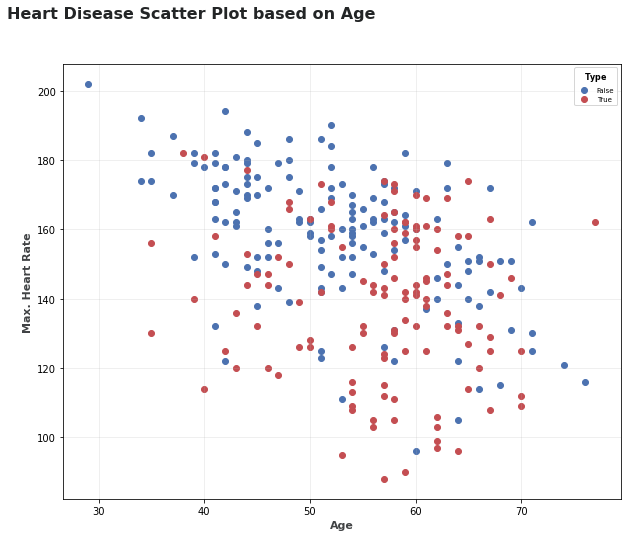

In [ ]:
# Scatter Plot Size & Titles Settings
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy',
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif',
             color=black_grad[0])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# Creating Scatter Plot
plt.scatter(x=df_heart.age[df_heart.condition==0], y=df_heart.thalach[(df_heart.condition==0)], c='#4C72B0')
plt.scatter(x=df_heart.age[df_heart.condition==1], y=df_heart.thalach[(df_heart.condition==1)], c='#C44E52')

# Scatter Plot Legend & Labels Settings
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7',
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', color=black_grad[1])
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

Berdasarkan usia, pasien dengan dan tanpa penyakit jantung sebagian besar berusia antara 50-70 tahun. Pasien dengan penyakit jantung cenderung memiliki denyut jantung yang tinggi\dibandingkan dengan pasien yang tidak memiliki penyakit jantung.


### Heart Disease Distribution based on Gender

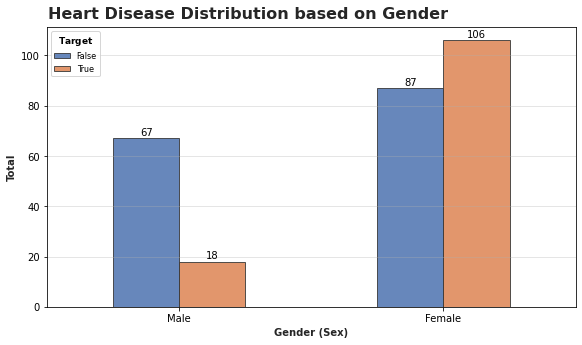

In [ ]:
# Labels Settings
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# Creating Bar Chart
ax = pd.crosstab(df_heart.sex, df_heart.condition).plot(kind='bar', figsize=(8, 5),
                                                        color=['#4C72B0', '#DD8452'],
                                                        edgecolor='#383838', alpha=0.85)

# Bar Chart Settings
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 1.25,
            rect.get_height(),
            horizontalalignment='center',
            fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender',
             fontweight='heavy',
             x=0.065,
             y=0.98,
             ha='left',
             fontsize='16',
             fontfamily='sans-serif',
             color='#262626')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)',
           fontfamily='sans-serif',
           fontweight='bold',
           color='#262626')
plt.ylabel('Total',
           fontfamily='sans-serif',
           fontweight='bold',
           color='#262626')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels,
           title='$\\bf{Target}$',
           fontsize='8',
           title_fontsize='9',
           loc='upper left',
           frameon=True);


Dari histogram diatas, perempuan cenderung memiliki penyakit jantung dibandingkan dengan laki-laki. Pada pria, distribusi tidak seimbang dibandingkan dengan wanita yang memiliki distribusi yang hampir sama'


### Heart Disease Distribution based on Major Vessels Total

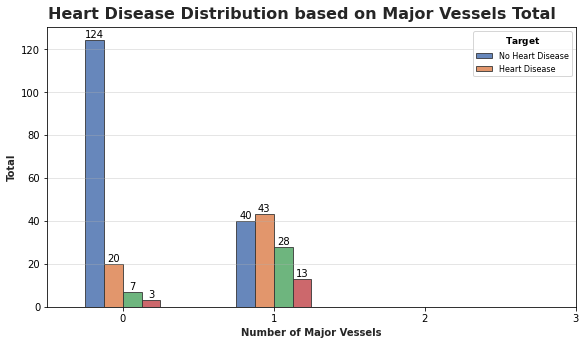

In [ ]:
# --- Labels Settings ---
labels = ['No Heart Disease', 'Heart Disease']
label_disease = range(4)
label_vessels = ['0', '1', '2', '3']

# --- Creating Bar Chart ---
ax = pd.crosstab(df_heart.condition, df_heart.ca).plot(kind='bar', figsize=(8, 5),
                                                  color=['#4C72B0', '#DD8452', '#55A868', '#C44E52'],
                                                  edgecolor='#383838', alpha=0.85)

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 1.25,
            rect.get_height(),
            horizontalalignment='center',
            fontsize=10)

plt.suptitle('Heart Disease Distribution based on Major Vessels Total',
             fontweight='heavy',
             x=0.065,
             y=0.98,
             ha='left',
             fontsize='16',
             fontfamily='sans-serif',
             color='#262626')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Number of Major Vessels',
           fontfamily='sans-serif',
           fontweight='bold',
           color='#262626')
plt.ylabel('Total',
           fontfamily='sans-serif',
           fontweight='bold',
           color='#262626')
plt.xticks(label_disease, label_vessels, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels,
           title='$\\bf{Target}$',
           fontsize='8',
           title_fontsize='9',
           loc='upper right',
           frameon=True)

Dari histogram diatas, pasien dengan pembuluh darah utama '0' dan '1' cenderung memiliki penyakit jantung. Namun, pasien yang memiliki jumlah pembuluh darah '2' dan '3' cenderung tidak memiliki penyakit jantung.


### Heart Disease Distribution based on Fasting Blood Sugar

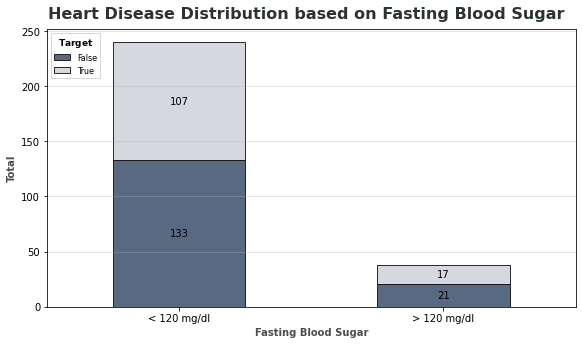

In [ ]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(df_heart.fbs, df_heart.condition).plot(kind='bar', figsize=(8, 5),
                                         color=['#3A506B', '#CED2D9'], stacked=True,
                                         edgecolor='#0A090C', alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height),
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar',
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16',
             fontfamily='sans-serif', color='#2C3335')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold',
           color='#4A4E4D')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold',
           color='#4A4E4D')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8',
           title_fontsize='9', loc='upper left', frameon=True);

Jumlah pasien dengan fasting blood sugar rendah lebih banyak dibandingkan dengan pasien dengan fasting blood sugar tinggi. Pada fasting blood sugar yang rendah, pasien cenderung memiliki penyakit jantung.

Dari grafik histogram tersebut, dapat dilihat bahwa distribusi data pada kolom resting blood pressure cenderung normal dengan rentang nilai sekitar 90-170 mmHg

### **Univariate Analysis**

In [ ]:
# function for displaying categorical distribution

def categorical_dist(df, cols, hue,rows, columns):
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()
    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    ax=j,
                    hue=hue,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        total = float(len(df[i]))
        j.set_title(f'{str(i).capitalize()} Distribution')
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        plt.tight_layout()

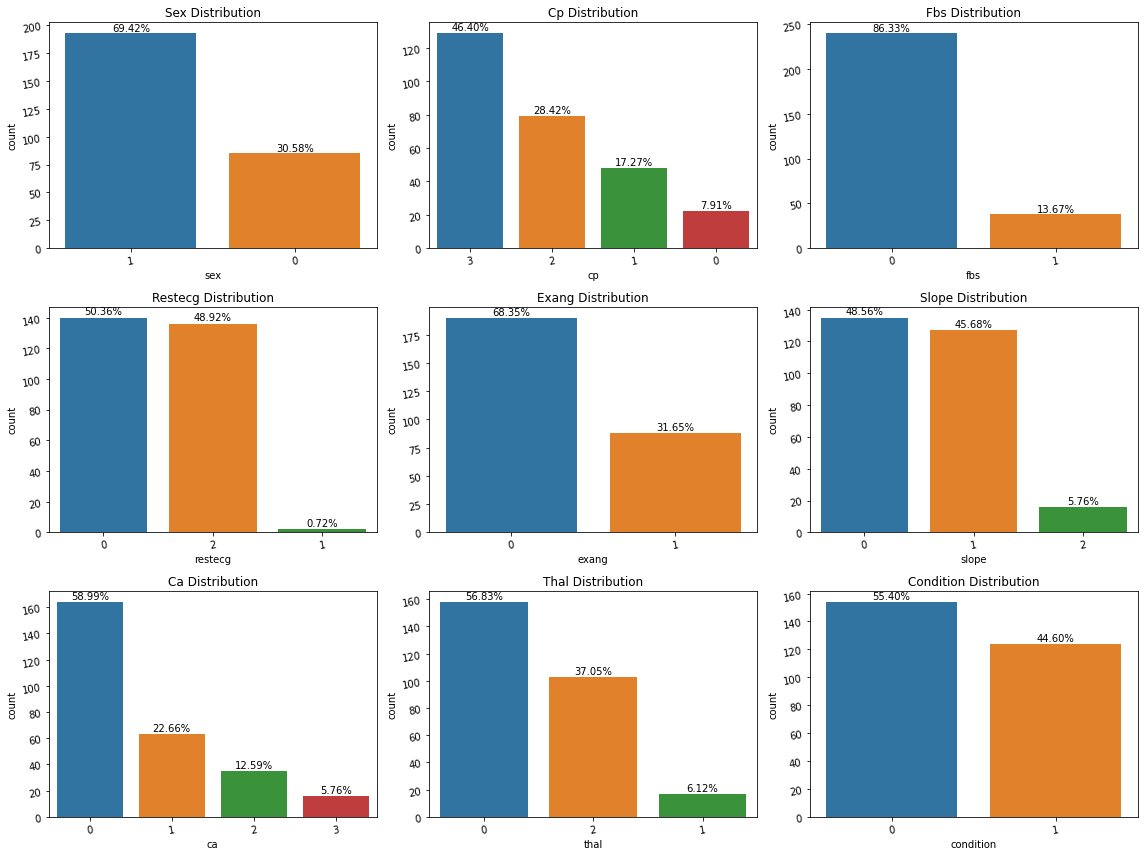

In [ ]:
categorical_dist(df_heart, ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "condition"], hue=None, rows=3,columns=3)

Dari visualisasi diatas, dapat dilihat bahwa:
- Laki-laki lebih banyak dari perempuan.
- Tipe 'chest pain' yang paling umum adalah asymptomatic
- Lebih dari 85% pasien tidak memiliki gula darah puasa yang tinggi.
- Restecg relatif terdistribusi merata
- Lebih dari 67% pasien tidak memiliki exercise induced angina
- Slope lebih terdistribusi antara upsloping dan flat.

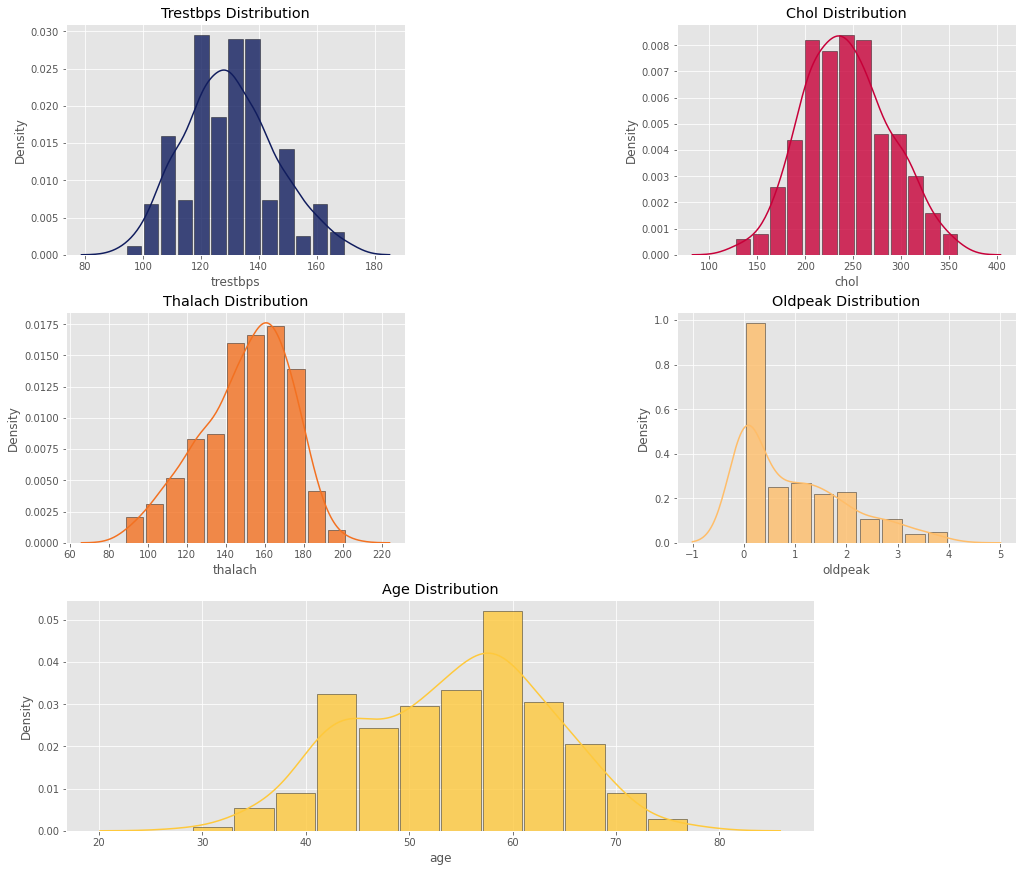

In [ ]:
import matplotlib.gridspec as gridspec
cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')

fig = plt.figure(constrained_layout=True, figsize=(16, 12))
grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Trestbps Distribution')
sns.distplot(df_heart['trestbps'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])
ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Chol Distribution')
sns.distplot(df_heart['chol'],hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])
ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Thalach Distribution')
sns.distplot(df_heart['thalach'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])
ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Oldpeak Distribution')
sns.distplot(df_heart['oldpeak'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])
ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Age Distribution')
sns.distplot(df_heart['age'],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])
plt.show()

Dari visualisasi diatas, dapat disimpulkan bahwa:

Hampir semua data numerik terdistribusi merata dengan sedikit kecondongan kecuali oldpeak yang lebih condong ke kiri.

### **Bivariate Analysis**

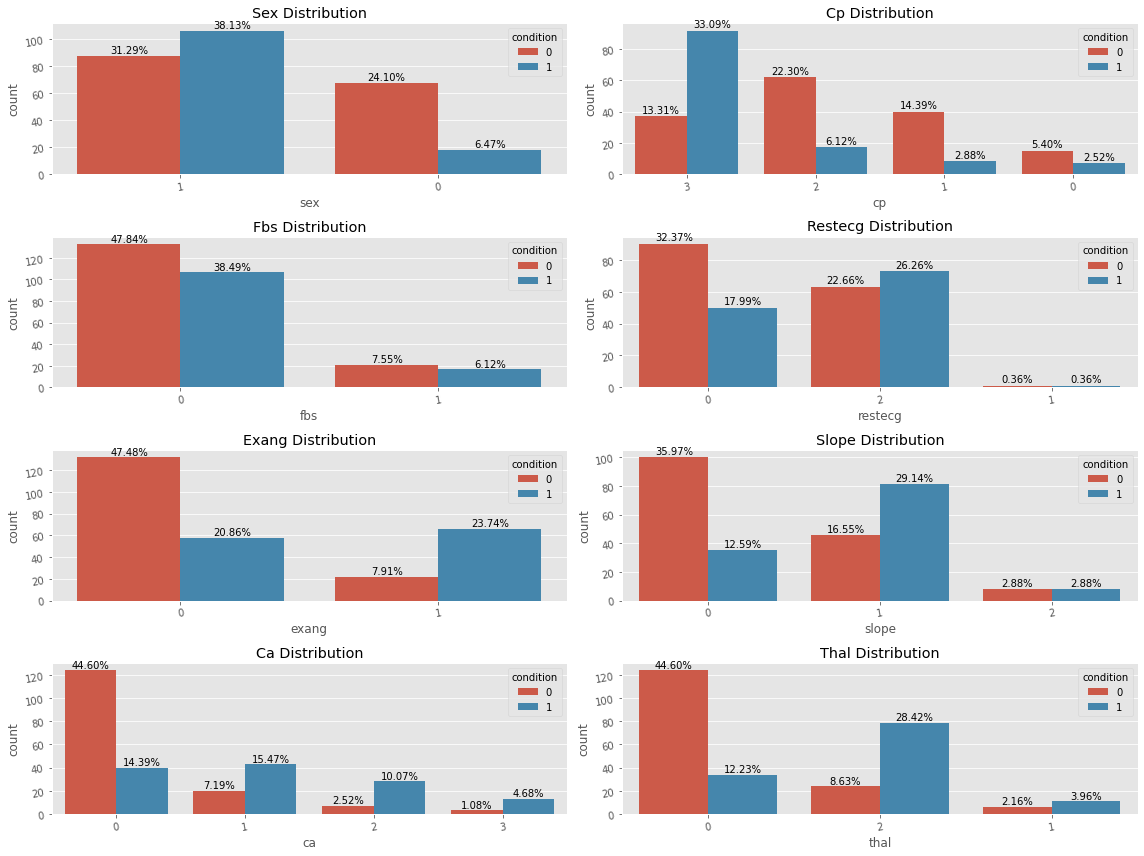

In [ ]:
categorical_dist(df_heart, ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"], 'condition', 4, 2)

Dari visualisasi diatas, dapat disimpulkan bahwa:
- Laki-laki memiliki kemungkinan lebih tinggi terkena penyakit jantung.
- Asymptomatic chest pain type memiliki jumlah penyakit jantung terbanyak.
- Gula darah tidak berpengaruh pada penyakit jantung.
- RestECG tidak memiliki pengaruh secara langsung terhadap penyakit jantung, namun apabila pasien memiliki ST-T wave yang abnormal maka pasien tersebut memiliki kemungkinan yang sangat tinggi terkena penyakit jantung.
- Exercise induced angina memiliki pengaruh kuat dalam penyakit jantung.
- Pasien yang memiliki flat slope memiliki kemungkinan yang lebih tinggi terkena penyakit jantung.
- Pasien yang memiliki defected thalium memiliki kemungkinan yang lebih tinggi terkena penyakit jantung.

### **Multivariate Analysis**

In [ ]:
fig = px.scatter_3d(df_heart, x='chol', y='thalach', z='age', size='oldpeak',
              color='condition', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

X axis menunjukkan Cholesterol, Y menunjukkan thalach dan Z axis adalah Age, marker sizes adalah oldpeak dan warna menunjukkan condition.

## **Scaling / Transformasi**

**Kita akan membandingkan dua metode untuk melakukan Scaling, disini kita akan menggunakan metode normalisasi MinMax dan Robust Scaler kemudian membandingkan hasil dari kedua metode tersebut.**

### Scaling menggunakan MinMax Scaler

Data yang sudah kita bersihkan dan kita hilangkan outliernya kemudian akan kita normalisasi menggunakan metode MinMax

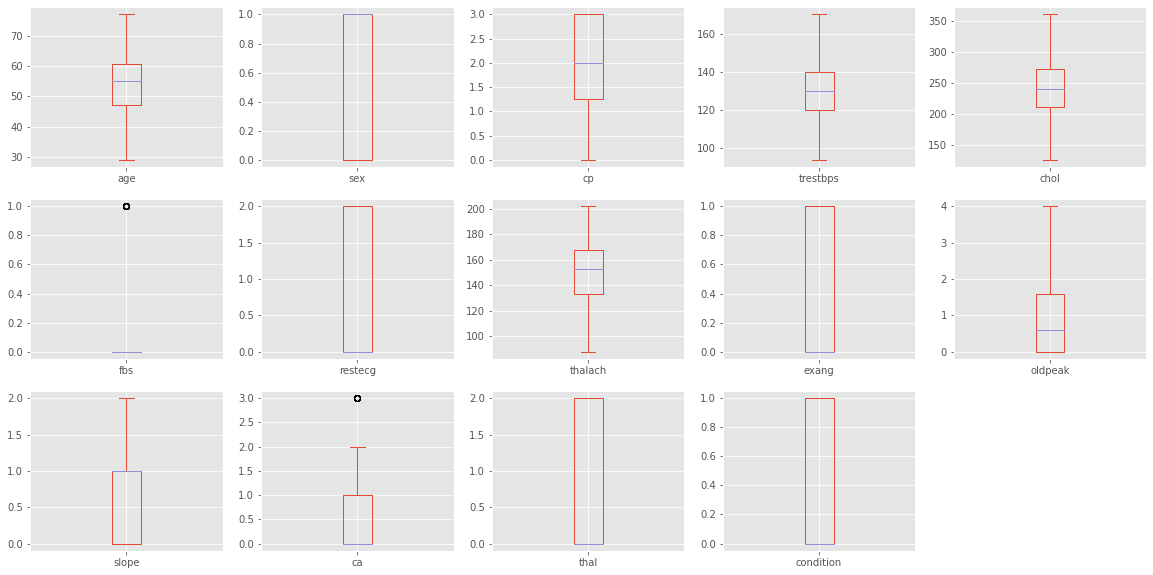

In [ ]:
# data yang sudah dibersihkan
df_heart.plot(kind='box', layout=(3, 5), figsize=(20,10), subplots=True, sharex=False, sharey=False)
plt.show()

In [ ]:
# normalisasi MinMax
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
list_fitur = [df_heart['trestbps'], df_heart['chol'], df_heart['thalach'], df_heart['oldpeak']]
scaled_data = scaler.fit_transform(list_fitur)
df_scaled_mm = pd.DataFrame(scaled_data.T, columns=['trestbps', 'chol', 'thalach', 'oldpeak'])
print(df_scaled_mm.shape)
df_scaled_mm.head()

(278, 4)


trestbps  chol   thalach  oldpeak
0  0.683625   1.0  0.559641      0.0
1  0.582631   1.0  0.629005      0.0
2  0.659803   1.0  0.498657      0.0
3  0.486814   1.0  0.615110      0.0
4  0.517208   1.0  0.679732      0.0

### Scaling dataset menggunakan Robust Scaler

Kita akan melakukan data scaling / transformation tanpa menghinlangkan outlier dengan menggunakan Robust Scaler.

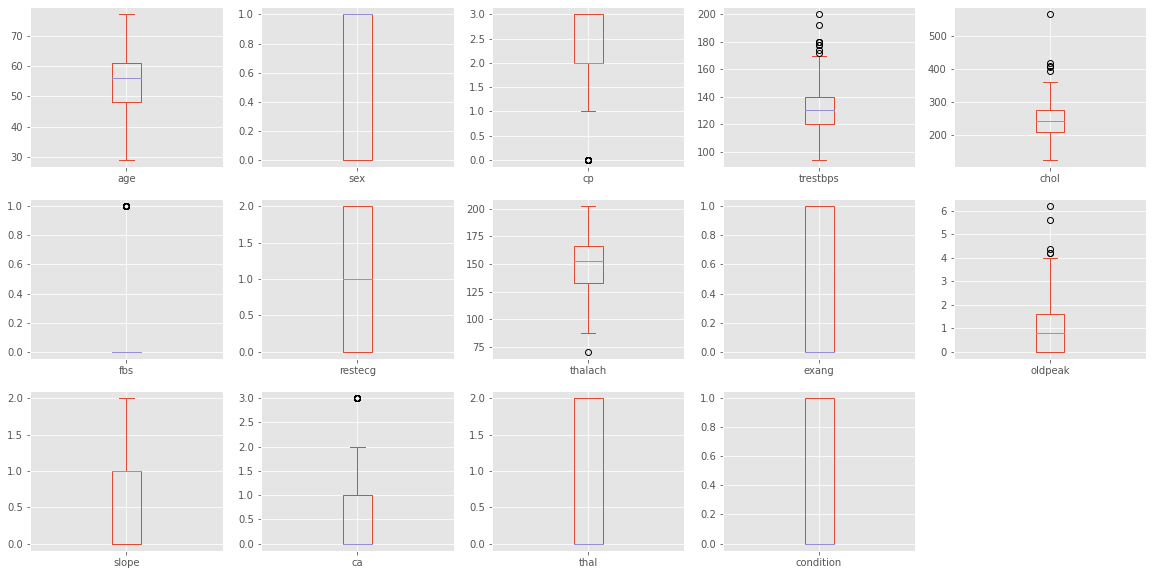

In [ ]:
# melihat outliers
df_heart_copy.plot(kind='box', layout=(3, 5), figsize=(20,10), subplots=True, sharex=False, sharey=False)
plt.show()

In [ ]:
# Scaling menggunakan Robust Scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
list_fitur = [df_heart_copy['trestbps'], df_heart_copy['chol'], df_heart_copy['thalach'], df_heart_copy['oldpeak']]
scaled_data = scaler.fit_transform(list_fitur)
df_scaled_robust = pd.DataFrame(scaled_data.T, columns=['trestbps', 'chol', 'thalach', 'oldpeak'])
print(df_scaled_robust.shape)
df_scaled_robust.head()

(297, 4)


trestbps      chol   thalach   oldpeak
0  0.180742  1.103147 -0.180742 -1.812403
1 -0.081421  1.384160  0.081421 -2.127313
2  0.217260  1.134581 -0.217260 -1.561859
3 -0.185280  1.296963  0.185280 -1.591354
4 -0.218509  1.079692  0.218509 -1.609254

## **Encoding**

### One Hot Encoding

In [ ]:
df_heart_copy.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

In [ ]:
df_heart = df_heart.drop(columns=['trestbps', 'chol', 'thalach', 'oldpeak'], axis=1)

In [ ]:
# encoding fitur categorical menggunakan One Hot Encoding (MinMax)

categorical = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
df_mm_encoded = pd.get_dummies(df_heart, columns=categorical)
df_mm_encoded.head()

age  condition  sex_0  sex_1  cp_0  cp_1  cp_2  cp_3  fbs_0  fbs_1  ...  \
0   69          0      0      1     1     0     0     0      0      1  ...   
1   69          0      1      0     1     0     0     0      1      0  ...   
2   66          0      1      0     1     0     0     0      1      0  ...   
3   65          1      0      1     1     0     0     0      0      1  ...   
4   64          0      0      1     1     0     0     0      1      0  ...   

   slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_0  thal_1  thal_2  
0        0        1        0     0     1     0     0       1       0       0  
1        1        0        0     0     0     1     0       1       0       0  
2        0        0        1     1     0     0     0       1       0       0  
3        0        1        0     0     1     0     0       1       0       0  
4        0        1        0     1     0     0     0       1       0       0  

[5 rows x 25 columns]

In [ ]:
df_heart_copy = df_heart_copy.drop(columns=['trestbps', 'chol', 'thalach', 'oldpeak'], axis=1)

In [ ]:
# encoding fitur categorical menggunakan One Hot Encoding (Robust)

categorical = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
df_robust_encoded = pd.get_dummies(df_heart_copy, columns=categorical)
df_robust_encoded.head()

age  condition  sex_0  sex_1  cp_0  cp_1  cp_2  cp_3  fbs_0  fbs_1  ...  \
0   69          0      0      1     1     0     0     0      0      1  ...   
1   69          0      1      0     1     0     0     0      1      0  ...   
2   66          0      1      0     1     0     0     0      1      0  ...   
3   65          1      0      1     1     0     0     0      0      1  ...   
4   64          0      0      1     1     0     0     0      1      0  ...   

   slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_0  thal_1  thal_2  
0        0        1        0     0     1     0     0       1       0       0  
1        1        0        0     0     0     1     0       1       0       0  
2        0        0        1     1     0     0     0       1       0       0  
3        0        1        0     0     1     0     0       1       0       0  
4        0        1        0     1     0     0     0       1       0       0  

[5 rows x 25 columns]

## Data Merging

In [ ]:
df_heart_mm = pd.concat([df_scaled_mm.reset_index(drop=True), df_mm_encoded.reset_index(drop=True)], axis=1)
df_heart_robust = pd.concat([df_scaled_robust.reset_index(drop=True), df_robust_encoded.reset_index(drop=True)], axis=1)

In [ ]:
df_heart_mm.head()

trestbps  chol   thalach  oldpeak  age  condition  sex_0  sex_1  cp_0  \
0  0.683625   1.0  0.559641      0.0   69          0      0      1     1   
1  0.582631   1.0  0.629005      0.0   69          0      1      0     1   
2  0.659803   1.0  0.498657      0.0   66          0      1      0     1   
3  0.486814   1.0  0.615110      0.0   65          1      0      1     1   
4  0.517208   1.0  0.679732      0.0   64          0      0      1     1   

   cp_1  ...  slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_0  \
0     0  ...        0        1        0     0     1     0     0       1   
1     0  ...        1        0        0     0     0     1     0       1   
2     0  ...        0        0        1     1     0     0     0       1   
3     0  ...        0        1        0     0     1     0     0       1   
4     0  ...        0        1        0     1     0     0     0       1   

   thal_1  thal_2  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 29 columns]

In [ ]:
df_heart_robust.head()

trestbps      chol   thalach   oldpeak  age  condition  sex_0  sex_1  cp_0  \
0  0.180742  1.103147 -0.180742 -1.812403   69          0      0      1     1   
1 -0.081421  1.384160  0.081421 -2.127313   69          0      1      0     1   
2  0.217260  1.134581 -0.217260 -1.561859   66          0      1      0     1   
3 -0.185280  1.296963  0.185280 -1.591354   65          1      0      1     1   
4 -0.218509  1.079692  0.218509 -1.609254   64          0      0      1     1   

   cp_1  ...  slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_0  \
0     0  ...        0        1        0     0     1     0     0       1   
1     0  ...        1        0        0     0     0     1     0       1   
2     0  ...        0        0        1     1     0     0     0       1   
3     0  ...        0        1        0     0     1     0     0       1   
4     0  ...        0        1        0     1     0     0     0       1   

   thal_1  thal_2  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 29 columns]

In [ ]:
df_heart_mm.isnull().sum()

trestbps     0
chol         0
thalach      0
oldpeak      0
age          0
condition    0
sex_0        0
sex_1        0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
fbs_0        0
fbs_1        0
restecg_0    0
restecg_1    0
restecg_2    0
exang_0      0
exang_1      0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
thal_0       0
thal_1       0
thal_2       0
dtype: int64

In [ ]:
df_heart_robust.isnull().sum()

trestbps     0
chol         0
thalach      0
oldpeak      0
age          0
condition    0
sex_0        0
sex_1        0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
fbs_0        0
fbs_1        0
restecg_0    0
restecg_1    0
restecg_2    0
exang_0      0
exang_1      0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
thal_0       0
thal_1       0
thal_2       0
dtype: int64

## **Machine Learning Model**

Algoritma yang akan dipakai:
1. K-Nearest Neighbor (KNN)
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. SVM

### Splitting Data

In [ ]:
# import library
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

Kita akan menggunakan kelima algoritma untuk masing-masing dataframe baru yang kita buat, yaitu df_heart_mm dan df_heart_robust

In [ ]:
# Split data into features and target
X = df_heart.drop(columns=['condition'])
y = df_heart['condition']

In [ ]:
# row and column data before split
print(df_heart_mm.shape)
print(df_heart_robust.shape)

(278, 29)
(297, 29)


In [ ]:
# split the MinMax data and show the rows and columns after the split
X_train_mm, X_test_mm = train_test_split(df_heart_mm, test_size=0.1)
y_train_mm = X_train_mm.pop('condition')
y_test_mm = X_test_mm.pop('condition')
print(X_train_mm.shape)
print(X_test_mm.shape)

(250, 28)
(28, 28)


In [ ]:
X_test_mm.head()

trestbps  chol   thalach  oldpeak  age  sex_0  sex_1  cp_0  cp_1  cp_2  \
35   0.500000   1.0  0.704167      0.0   56      0      1     0     1     0   
249  0.549550   1.0  0.837838      0.0   48      0      1     0     0     0   
247  0.483271   1.0  0.605948      0.0   49      1      0     0     0     0   
108  0.796020   1.0  0.810945      0.0   54      1      0     0     0     1   
225  0.620690   1.0  0.630542      0.0   55      1      0     0     0     0   

     ...  slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_0  thal_1  \
35   ...        0        0        1     1     0     0     0       1       0   
249  ...        1        0        0     1     0     0     0       1       0   
247  ...        1        0        0     1     0     0     0       1       0   
108  ...        1        0        0     0     1     0     0       1       0   
225  ...        0        1        0     0     1     0     0       0       0   

     thal_2  
35        0  
249       0  
247       0  
108       0  
225       1  

[5 rows x 28 columns]

In [ ]:
# split the Robust data and show the rows and columns after the split
X_train_robust, X_test_robust = train_test_split(df_heart_robust, test_size=0.1)
y_train_robust = X_train_robust.pop('condition')
y_test_robust = X_test_robust.pop('condition')
print(X_train_robust.shape)
print(X_test_robust.shape)

(267, 28)
(30, 28)


In [ ]:
X_test_robust.head()

trestbps      chol   thalach   oldpeak  age  sex_0  sex_1  cp_0  cp_1  \
113 -0.028571  0.752381  0.028571 -3.076190   54      1      0     0     0   
238 -0.070314  2.346737  0.070314 -1.231378   56      1      0     0     0   
65  -0.325581  0.635659  0.325581 -1.410853   41      1      0     0     1   
37  -0.078384  1.778716  0.078384 -1.750980   56      1      0     0     1   
217  0.241888  1.091445 -0.241888 -1.457227   58      0      1     0     0   

     cp_2  ...  slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_0  \
113     1  ...        1        0        0     0     1     0     0       1   
238     0  ...        0        1        0     0     0     1     0       0   
65      0  ...        1        0        0     0     1     0     0       1   
37      0  ...        0        1        0     1     0     0     0       1   
217     0  ...        0        1        0     0     1     0     0       0   

     thal_1  thal_2  
113       0       0  
238       0       1  
65        0       0  
37        0       0  
217       0       1  

[5 rows x 28 columns]

## **Modelling #1**

In [ ]:
# install optuna & import modelling algoritm
!pip install optuna

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.3 MB/s eta 0:00:00


### Menggunakan Robust Scaler

#### Base Model

In [ ]:
# K-Nearest Neighbor (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_robust, y_train_robust)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_robust, y_train_robust)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_robust, y_train_robust)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
svm.fit(X_train_robust, y_train_robust)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(X_train_robust, y_train_robust)

LogisticRegression(C=1, max_iter=1000, random_state=42)

Setelah itu, kita dapat menguji performa model pada set pengujian dan menghitung skor recall:

In [ ]:
# Recall score for base models
models = [("K-Nearest Neighbor (KNN)", knn),
          ("Decision Tree", dt),
          ("Random Forest", rf),
          ("Support Vector Machine (SVM)", svm),
          ("Logistic Regression", lr)]

print("Recall Scores for Base Models:\n")
for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test_robust)
    score = recall_score(y_test_robust, y_pred)
    print(f"Model {i+1}: {name:<30} - Recall score = {score:.3f}")

Recall Scores for Base Models:

Model 1: K-Nearest Neighbor (KNN)       - Recall score = 0.583
Model 2: Decision Tree                  - Recall score = 0.750
Model 3: Random Forest                  - Recall score = 0.750
Model 4: Support Vector Machine (SVM)   - Recall score = 0.667
Model 5: Logistic Regression            - Recall score = 0.750


In [ ]:
# buat fungsi visualisasi confusion matrix

def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['No Disease', 'Disease'])
    ax.yaxis.set_ticklabels(['No Disease', 'Disease'])
    plt.show()

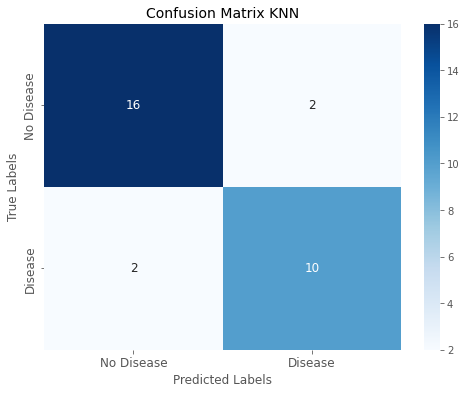

In [ ]:
plotting_confusion_matrix(knn, X_test_robust, y_test_robust, title='KNN')

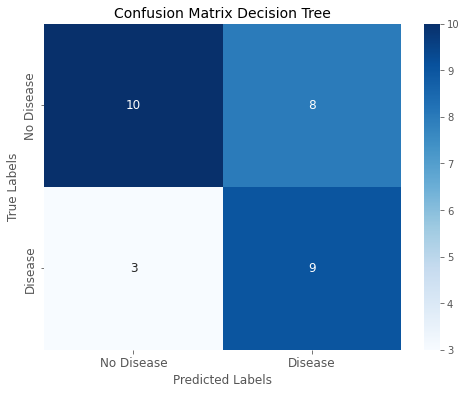

In [ ]:
plotting_confusion_matrix(dt, X_test_robust, y_test_robust, title='Decision Tree')

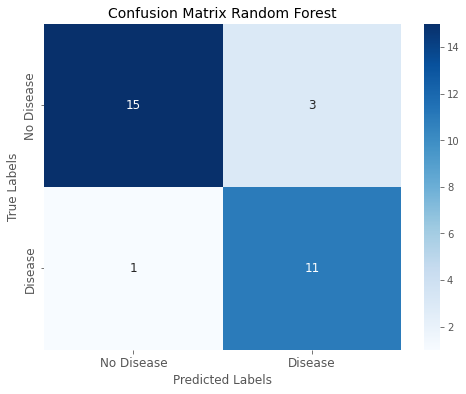

In [ ]:
plotting_confusion_matrix(rf, X_test_robust, y_test_robust, title='Random Forest')

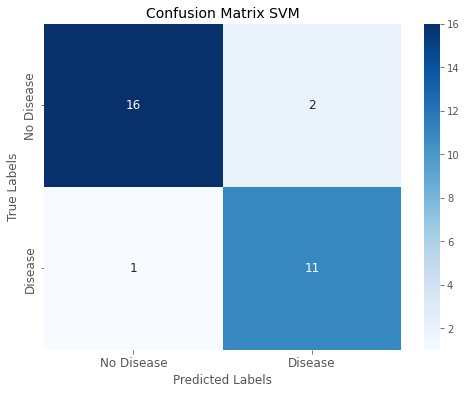

In [ ]:
plotting_confusion_matrix(svm, X_test_robust, y_test_robust, title='SVM')

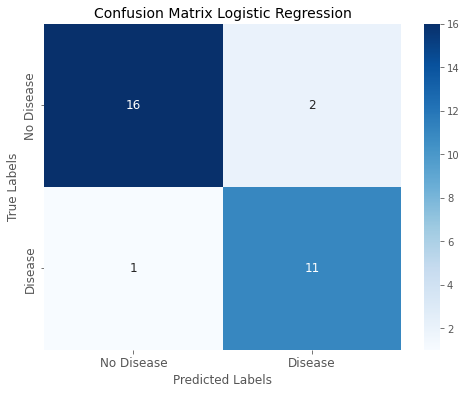

In [ ]:
plotting_confusion_matrix(lr, X_test_robust, y_test_robust, title='Logistic Regression')

#### Tuned Model

Selanjutnya, kita dapat melakukan hyperparameter tuning menggunakan Optuna untuk masing-masing model:

In [ ]:
# Hyperparameter tuning using Optuna

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_robust, y_train_robust)
    y_pred = knn.predict(X_test_robust)
    return recall_score(y_test_robust, y_pred)

def objective_dt(trial):
    max_depth = trial.suggest_int('max_depth', 1, 10)
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train_robust, y_train_robust)
    y_pred = dt.predict(X_test_robust)
    return recall_score(y_test_robust, y_pred)

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200, 10)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train_robust, y_train_robust)
    y_pred = rf.predict(X_test_robust)
    return recall_score(y_test_robust, y_pred)

def objective_svm(trial):
    C = trial.suggest_loguniform('C', 0.1, 10)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    svm = SVC(kernel='linear', C=C, gamma=gamma, random_state=42)
    svm.fit(X_train_robust, y_train_robust)
    y_pred = svm.predict(X_test_robust)
    return recall_score(y_test_robust, y_pred)

def objective_lr(trial):
    C = trial.suggest_loguniform('C', 0.1, 10)
    lr = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000, random_state=42)
    lr.fit(X_train_robust, y_train_robust)
    y_pred = lr.predict(X_test_robust)
    return recall_score(y_test_robust, y_pred)

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=100)

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=100)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=100)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100)

[I 2023-03-17 23:43:07,228] A new study created in memory with name: no-name-817b8ae7-0b73-4b7f-9d29-fdf706ab8281
[I 2023-03-17 23:43:07,244] Trial 0 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:43:07,259] Trial 1 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:43:07,273] Trial 2 finished with value: 0.75 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:43:07,287] Trial 3 finished with value: 0.6666666666666666 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:43:07,304] Trial 4 finished with value: 0.75 and parameters: {'n_neighbors': 15}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:43:07,316] Trial 5 finished with value: 0.75 and parameters: {'n_neighbors': 19}. Best is trial

Setelah melakukan hyperparameter tuning, kita dapat membuat model baru dengan parameter terbaik yang ditemukan dan melatihnya menggunakan set pelatihan:


In [ ]:
# Train models using optimal hyperparameters

# KNN
knn_best = KNeighborsClassifier(n_neighbors=study_knn.best_params['n_neighbors'])
knn_best.fit(X_train_robust, y_train_robust)

KNeighborsClassifier()

In [ ]:
# Decision Tree
dt_best = DecisionTreeClassifier(max_depth=study_dt.best_params['max_depth'], random_state=42)
dt_best.fit(X_train_robust, y_train_robust)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [ ]:
# Random Forest
rf_best = RandomForestClassifier(n_estimators=study_rf.best_params['n_estimators'], max_depth=study_rf.best_params['max_depth'], random_state=42)
rf_best.fit(X_train_robust, y_train_robust)

RandomForestClassifier(max_depth=9, n_estimators=40, random_state=42)

In [ ]:
# Support Vector Machine (SVM)
svm_best = SVC(kernel='linear', C=study_svm.best_params['C'], gamma=study_svm.best_params['gamma'], random_state=42)
svm_best.fit(X_train_robust, y_train_robust)

SVC(C=9.68891671576978, kernel='linear', random_state=42)

In [ ]:
# Logistic Regression
lr_best = LogisticRegression(penalty='l2', C=study_lr.best_params['C'], solver='lbfgs', max_iter=1000, random_state=42)
lr_best.fit(X_train_robust, y_train_robust)

LogisticRegression(C=0.1317479077166356, max_iter=1000, random_state=42)

Terakhir, kita dapat menguji performa model dengan parameter terbaik pada set pengujian dan menghitung skor recall:

In [ ]:
# Recall score for tuned models
models_best = [("K-Nearest Neighbor (KNN)", knn_best),
               ("Decision Tree", dt_best),
               ("Random Forest", rf_best),
               ("Support Vector Machine (SVM)", svm_best),
               ("Logistic Regression", lr_best)]

print("Recall score for tuned models:")
for name, model in models_best:
    y_pred = model.predict(X_test_robust)
    score = recall_score(y_test_robust, y_pred)
    model_number = models_best.index((name, model)) + 1
    print(f"Tuned Model {model_number}: {name:<30} - Recall score = {score:.3f}")

Recall score for tuned models:
Tuned Model 1: K-Nearest Neighbor (KNN)       - Recall score = 0.750
Tuned Model 2: Decision Tree                  - Recall score = 0.750
Tuned Model 3: Random Forest                  - Recall score = 0.750
Tuned Model 4: Support Vector Machine (SVM)   - Recall score = 0.667
Tuned Model 5: Logistic Regression            - Recall score = 0.833


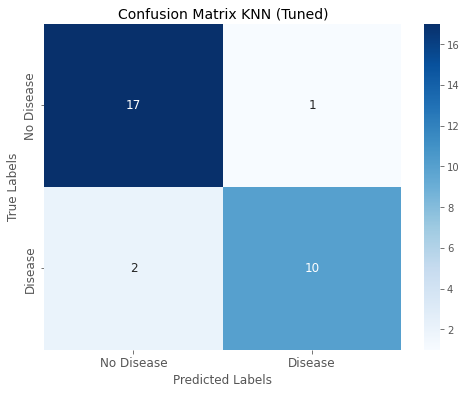

In [ ]:
plotting_confusion_matrix(knn_best, X_test_robust, y_test_robust, title='KNN (Tuned)')

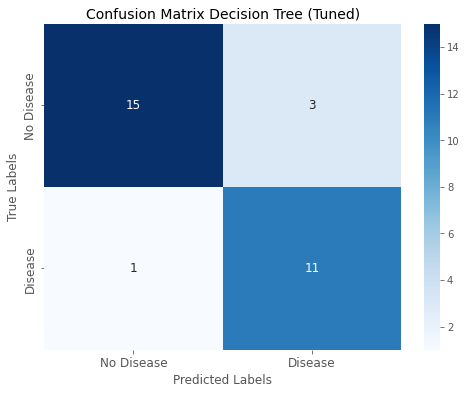

In [ ]:
plotting_confusion_matrix(dt_best, X_test_robust, y_test_robust, title='Decision Tree (Tuned)')

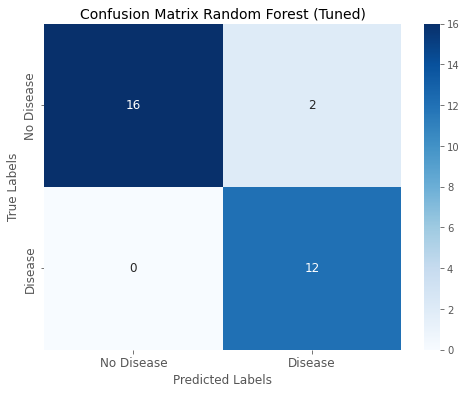

In [ ]:
plotting_confusion_matrix(rf_best, X_test_robust, y_test_robust, title='Random Forest (Tuned)')

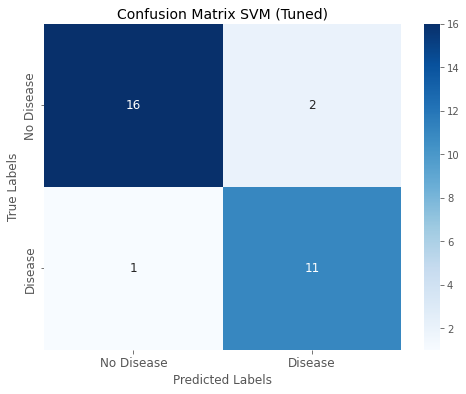

In [ ]:
plotting_confusion_matrix(svm_best, X_test_robust, y_test_robust, title='SVM (Tuned)')

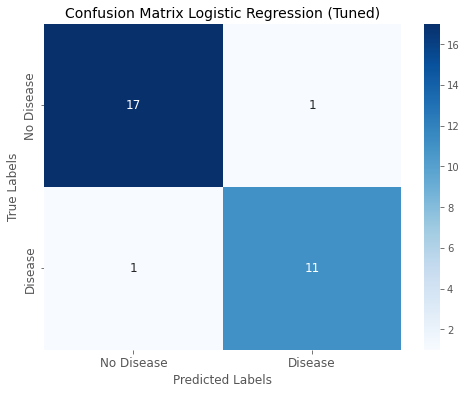

In [ ]:
plotting_confusion_matrix(lr_best, X_test_robust, y_test_robust, title='Logistic Regression (Tuned)')

#### Score for All Model

Setelah itu, kita dapat menghitung skor Recall untuk semua model yang telah dibuat:

In [ ]:
# Function to compute recall score for all models
def score_all_classification(models, X_train, y_train, X_test, y_test):
    for i, (name, model) in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = recall_score(y_test, y_pred)
        print(f"{name:<30} - Recall score = {score:.3f}")

# Scoring all models
print("Base Models")
score_all_classification(models, X_train_robust, y_train_robust, X_test_robust, y_test_robust)
print("\nTuned Models")
score_all_classification(models_best, X_train_robust, y_train_robust, X_test_robust, y_test_robust)


Base Models
K-Nearest Neighbor (KNN)       - Recall score = 0.583
Decision Tree                  - Recall score = 0.750
Random Forest                  - Recall score = 0.750
Support Vector Machine (SVM)   - Recall score = 0.667
Logistic Regression            - Recall score = 0.750

Tuned Models
K-Nearest Neighbor (KNN)       - Recall score = 0.750
Decision Tree                  - Recall score = 0.750
Random Forest                  - Recall score = 0.750
Support Vector Machine (SVM)   - Recall score = 0.667
Logistic Regression            - Recall score = 0.833


Setelah itu, kita melakukan cross validation dari model yang telah digunakan:

In [ ]:
from sklearn.model_selection import cross_val_score

def evaluate_models(models, X, y, cv=5, scoring='recall'):
    for name, model in models:
        recall_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        print(f"{name:<30}: Mean Recall score = {recall_scores.mean():.3f}")

print("Base Models")
evaluate_models(models, X_train_robust, y_train_robust, cv=5, scoring='recall')
print("\nTuned Models")
evaluate_models(models_best, X_train_robust, y_train_robust, cv=5, scoring='recall')

Base Models
K-Nearest Neighbor (KNN)      : Mean Recall score = 0.696
Decision Tree                 : Mean Recall score = 0.704
Random Forest                 : Mean Recall score = 0.784
Support Vector Machine (SVM)  : Mean Recall score = 0.752
Logistic Regression           : Mean Recall score = 0.784

Tuned Models
K-Nearest Neighbor (KNN)      : Mean Recall score = 0.688
Decision Tree                 : Mean Recall score = 0.720
Random Forest                 : Mean Recall score = 0.760
Support Vector Machine (SVM)  : Mean Recall score = 0.768
Logistic Regression           : Mean Recall score = 0.784


#### Feature Importance

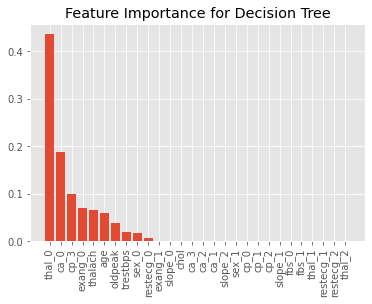

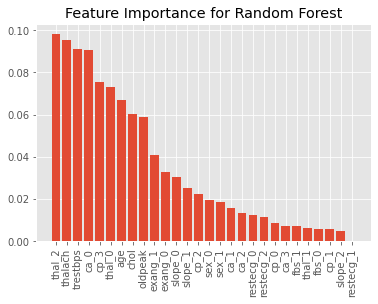

In [ ]:
# Decision Tree
dt_best.fit(X_train_robust, y_train_robust)
importances = dt_best.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_robust.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance for Decision Tree")
plt.bar(range(X_train_robust.shape[1]), importances[indices])
plt.xticks(range(X_train_robust.shape[1]), names, rotation=90)
plt.show()

print()
# Random Forest
rf_best.fit(X_train_robust, y_train_robust)
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_robust.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance for Random Forest")
plt.bar(range(X_train_robust.shape[1]), importances[indices])
plt.xticks(range(X_train_robust.shape[1]), names, rotation=90)
plt.show()

Dari visulalisasi tersebut kita bisa tahu bahwa faktor yang mempengaruhi seseorang memiliki penyakit jantung atau tidak adalah thal, ca, cp, trestbps, dan thalach.

### Menggunakan MinMax Scaler

#### Base Model

In [ ]:
# K-Nearest Neighbor (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_mm, y_train_mm)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_mm, y_train_mm)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_mm, y_train_mm)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
svm.fit(X_train_mm, y_train_mm)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(X_train_mm, y_train_mm)

LogisticRegression(C=1, max_iter=1000, random_state=42)

In [ ]:
# Recall score for base models
models = [("K-Nearest Neighbor (KNN)", knn),
          ("Decision Tree", dt),
          ("Random Forest", rf),
          ("Support Vector Machine (SVM)", svm),
          ("Logistic Regression", lr)]

print("Recall Scores for Base Models:\n")
for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test_mm)
    score = recall_score(y_test_mm, y_pred)
    print(f"Model {i+1}: {name:<30} - Recall score = {score:.3f}")

Recall Scores for Base Models:

Model 1: K-Nearest Neighbor (KNN)       - Recall score = 0.733
Model 2: Decision Tree                  - Recall score = 0.667
Model 3: Random Forest                  - Recall score = 0.667
Model 4: Support Vector Machine (SVM)   - Recall score = 0.600
Model 5: Logistic Regression            - Recall score = 0.600


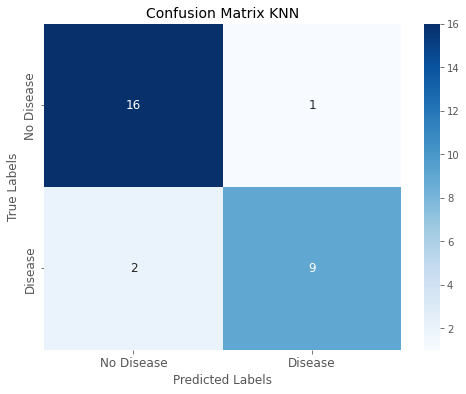

In [ ]:
plotting_confusion_matrix(knn, X_test_mm, y_test_mm, title='KNN')

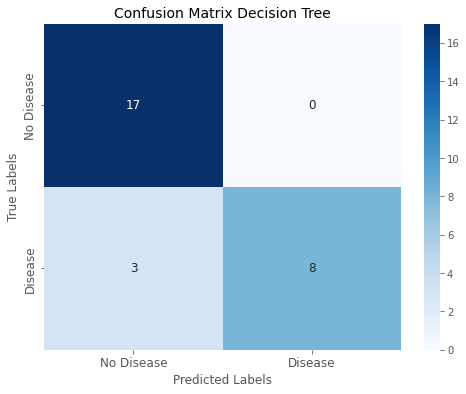

In [ ]:
plotting_confusion_matrix(dt, X_test_mm, y_test_mm, title='Decision Tree')

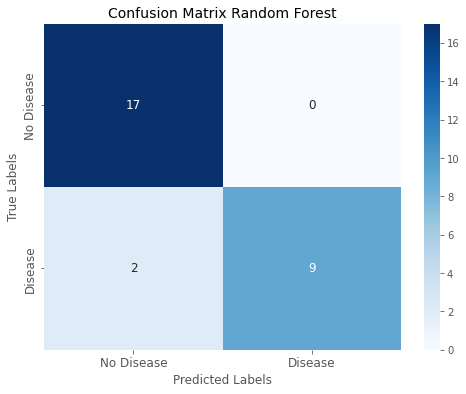

In [ ]:
plotting_confusion_matrix(rf, X_test_mm, y_test_mm, title='Random Forest')

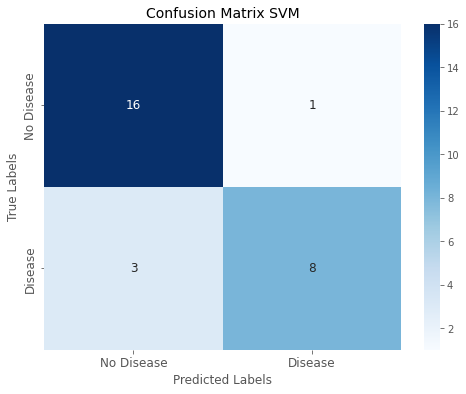

In [ ]:
plotting_confusion_matrix(svm, X_test_mm, y_test_mm, title='SVM')

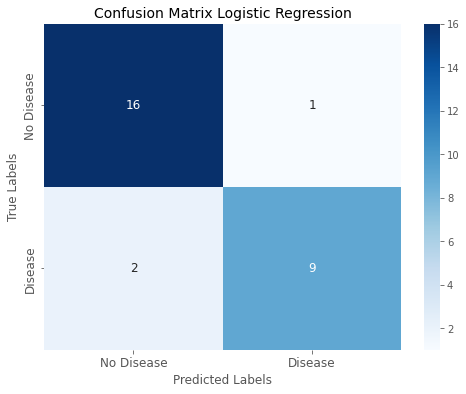

In [ ]:
plotting_confusion_matrix(lr, X_test_mm, y_test_mm, title='Logistic Regression')

#### Tuned Model

In [ ]:
# Hyperparameter tuning using Optuna

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_mm, y_train_mm)
    y_pred = knn.predict(X_test_mm)
    return recall_score(y_test_mm, y_pred)

def objective_dt(trial):
    max_depth = trial.suggest_int('max_depth', 1, 10)
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train_mm, y_train_mm)
    y_pred = dt.predict(X_test_mm)
    return recall_score(y_test_mm, y_pred)

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200, 10)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train_mm, y_train_mm)
    y_pred = rf.predict(X_test_mm)
    return recall_score(y_test_mm, y_pred)

def objective_svm(trial):
    C = trial.suggest_loguniform('C', 0.1, 10)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    svm = SVC(kernel='linear', C=C, gamma=gamma, random_state=42)
    svm.fit(X_train_mm, y_train_mm)
    y_pred = svm.predict(X_test_mm)
    return recall_score(y_test_mm, y_pred)

def objective_lr(trial):
    C = trial.suggest_loguniform('C', 0.1, 10)
    lr = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000, random_state=42)
    lr.fit(X_train_mm, y_train_mm)
    y_pred = lr.predict(X_test_mm)
    return recall_score(y_test_mm, y_pred)

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=100)

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=100)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=100)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100)

[I 2023-03-17 23:46:24,484] A new study created in memory with name: no-name-c920c05f-651d-4cb7-800a-075ab6aa2dd8
[I 2023-03-17 23:46:24,504] Trial 0 finished with value: 0.7272727272727273 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 0.7272727272727273.
[I 2023-03-17 23:46:24,522] Trial 1 finished with value: 0.7272727272727273 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.7272727272727273.
[I 2023-03-17 23:46:24,541] Trial 2 finished with value: 0.7272727272727273 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.7272727272727273.
[I 2023-03-17 23:46:24,556] Trial 3 finished with value: 0.7272727272727273 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.7272727272727273.
[I 2023-03-17 23:46:24,571] Trial 4 finished with value: 0.7272727272727273 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 0.7272727272727273.
[I 2023-03-17 23:46:24,587] Trial 5 finished with value: 0.8181818181818182 and pa

In [ ]:
# Train models using optimal hyperparameters

# KNN
knn_best = KNeighborsClassifier(n_neighbors=study_knn.best_params['n_neighbors'])
knn_best.fit(X_train_mm, y_train_mm)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Decision Tree
dt_best = DecisionTreeClassifier(max_depth=study_dt.best_params['max_depth'], random_state=42)
dt_best.fit(X_train_mm, y_train_mm)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Random Forest
rf_best = RandomForestClassifier(n_estimators=study_rf.best_params['n_estimators'], max_depth=study_rf.best_params['max_depth'], random_state=42)
rf_best.fit(X_train_mm, y_train_mm)

RandomForestClassifier(max_depth=7, n_estimators=20, random_state=42)

In [ ]:
# Support Vector Machine (SVM)
svm_best = SVC(kernel='linear', C=study_svm.best_params['C'], gamma=study_svm.best_params['gamma'], random_state=42)
svm_best.fit(X_train_mm, y_train_mm)

SVC(C=2.5974915937114305, kernel='linear', random_state=42)

In [ ]:
# Logistic Regression
lr_best = LogisticRegression(penalty='l2', C=study_lr.best_params['C'], solver='lbfgs', max_iter=1000, random_state=42)
lr_best.fit(X_train_mm, y_train_mm)

LogisticRegression(C=0.24884089605726228, max_iter=1000, random_state=42)

In [ ]:
# Recall score for tuned models
models_best = [("K-Nearest Neighbor (KNN)", knn_best),
               ("Decision Tree", dt_best),
               ("Random Forest", rf_best),
               ("Support Vector Machine (SVM)", svm_best),
               ("Logistic Regression", lr_best)]

print("Recall score for tuned models:")
for name, model in models_best:
    y_pred = model.predict(X_test_mm)
    score = recall_score(y_test_mm, y_pred)
    model_number = models_best.index((name, model)) + 1
    print(f"Tuned Model {model_number}: {name:<30} - Recall score = {score:.3f}")

Recall score for tuned models:
Tuned Model 1: K-Nearest Neighbor (KNN)       - Recall score = 0.733
Tuned Model 2: Decision Tree                  - Recall score = 0.733
Tuned Model 3: Random Forest                  - Recall score = 0.800
Tuned Model 4: Support Vector Machine (SVM)   - Recall score = 0.600
Tuned Model 5: Logistic Regression            - Recall score = 0.600


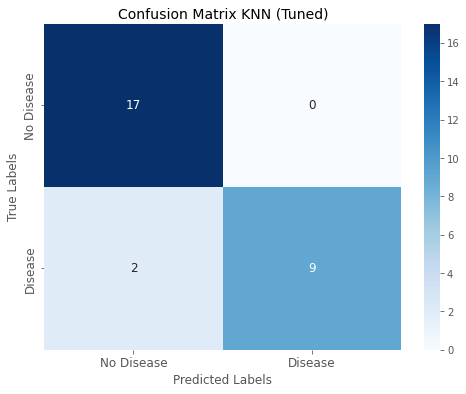

In [ ]:
plotting_confusion_matrix(knn_best, X_test_mm, y_test_mm, title='KNN (Tuned)')

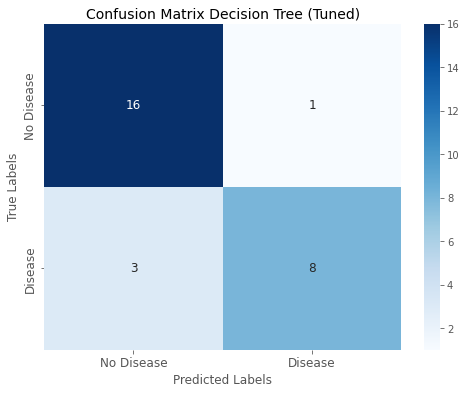

In [ ]:
plotting_confusion_matrix(dt_best, X_test_mm, y_test_mm, title='Decision Tree (Tuned)')

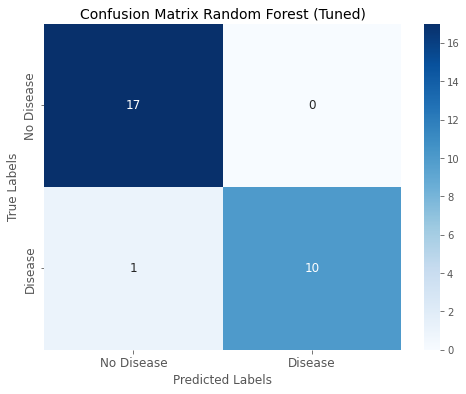

In [ ]:
plotting_confusion_matrix(rf_best, X_test_mm, y_test_mm, title='Random Forest (Tuned)')

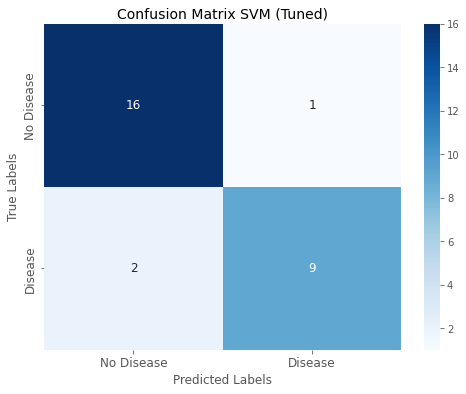

In [ ]:
plotting_confusion_matrix(svm_best, X_test_mm, y_test_mm, title='SVM (Tuned)')

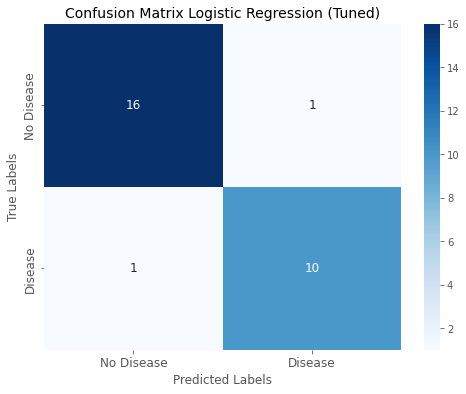

In [ ]:
plotting_confusion_matrix(lr_best, X_test_mm, y_test_mm, title='Logistic Regression (Tuned)')

#### Score for All Model

In [ ]:
# Function to compute recall score for all models
def score_all_classification(models, X_train, y_train, X_test, y_test):
    for i, (name, model) in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = recall_score(y_test, y_pred)
        print(f"{name:<30}: Recall score = {score:.3f}")

# Scoring all models
print("Base Models")
score_all_classification(models, X_train_mm, y_train_mm, X_test_mm, y_test_mm)
print("\nTuned Models")
score_all_classification(models_best, X_train_mm, y_train_mm, X_test_mm, y_test_mm)


Base Models
K-Nearest Neighbor (KNN)      : Recall score = 0.733
Decision Tree                 : Recall score = 0.667
Random Forest                 : Recall score = 0.667
Support Vector Machine (SVM)  : Recall score = 0.600
Logistic Regression           : Recall score = 0.600

Tuned Models
K-Nearest Neighbor (KNN)      : Recall score = 0.733
Decision Tree                 : Recall score = 0.733
Random Forest                 : Recall score = 0.800
Support Vector Machine (SVM)  : Recall score = 0.600
Logistic Regression           : Recall score = 0.600


In [ ]:
from sklearn.model_selection import cross_val_score

def evaluate_models(models, X, y, cv=5, scoring='recall'):
    for name, model in models:
        recall_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        print(f"{name:<30}: Mean Recall score = {recall_scores.mean():.3f}")

print("Base Models")
evaluate_models(models, X_train_mm, y_train_mm, cv=5, scoring='recall')
print("\nTuned Models")
evaluate_models(models_best, X_train_mm, y_train_mm, cv=5, scoring='recall')

Base Models
K-Nearest Neighbor (KNN)      : Mean Recall score = 0.715
Decision Tree                 : Mean Recall score = 0.687
Random Forest                 : Mean Recall score = 0.788
Support Vector Machine (SVM)  : Mean Recall score = 0.797
Logistic Regression           : Mean Recall score = 0.806

Tuned Models
K-Nearest Neighbor (KNN)      : Mean Recall score = 0.715
Decision Tree                 : Mean Recall score = 0.687
Random Forest                 : Mean Recall score = 0.770
Support Vector Machine (SVM)  : Mean Recall score = 0.816
Logistic Regression           : Mean Recall score = 0.797


#### Feature Importance

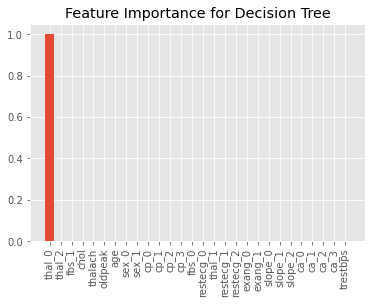

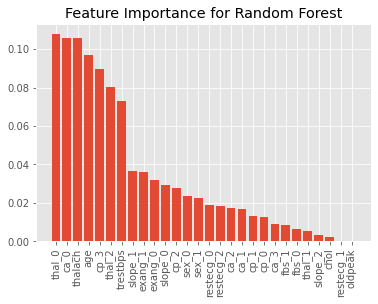

In [ ]:
# Decision Tree
dt_best.fit(X_train_mm, y_train_mm)
importances = dt_best.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_mm.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance for Decision Tree")
plt.bar(range(X_train_mm.shape[1]), importances[indices])
plt.xticks(range(X_train_mm.shape[1]), names, rotation=90)
plt.show()

print()
# Random Forest
rf_best.fit(X_train_mm, y_train_mm)
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_mm.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance for Random Forest")
plt.bar(range(X_train_mm.shape[1]), importances[indices])
plt.xticks(range(X_train_mm.shape[1]), names, rotation=90)
plt.show()

## **Modelling #2**

Kita akan memilih 10 fitur teratas berdasarkan gabungan feature importance dari decision tree dan random forest.

In [ ]:
# memilih 10 fitur teatas
feature_dt = pd.Series(dt_best.feature_importances_, index=X_train_mm.columns).nlargest(10).index.tolist()
feature_rf = pd.Series(rf_best.feature_importances_, index=X_train_mm.columns).nlargest(10).index.tolist()

selected_cols = [col for col in feature_dt]
for col in feature_rf:
    if col not in selected_cols:
        selected_cols.append(col)

selected_cols

['cp_3',
 'thal_0',
 'ca_0',
 'age',
 'sex_0',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'sex_1',
 'thal_2',
 'exang_1',
 'slope_1',
 'slope_0']

In [ ]:
# membuat X dan y baru menggunakan fitur yang dipilih
X_train_mm2 = X_train_mm[selected_cols]
y_train_mm2 = y_train_mm.copy()
X_test_mm2 = X_test_mm[selected_cols]
y_test_mm2 = y_test_mm.copy()

In [ ]:
# memilih 10 fitur teratas
feature_dt = pd.Series(dt_best.feature_importances_, index=X_train_robust.columns).nlargest(10).index.tolist()
feature_rf = pd.Series(rf_best.feature_importances_, index=X_train_robust.columns).nlargest(10).index.tolist()

selected_cols = [col for col in feature_dt]
for col in feature_rf:
    if col not in selected_cols:
        selected_cols.append(col)

selected_cols

['cp_3',
 'thal_0',
 'ca_0',
 'age',
 'sex_0',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'sex_1',
 'thal_2',
 'exang_1',
 'slope_1',
 'slope_0']

In [ ]:
# membuat X dan y baru menggunakan fitur yang dipilih
X_train_robust2 = X_train_robust[selected_cols]
y_train_robust2 = y_train_robust.copy()
X_test_robust2 = X_test_robust[selected_cols]
y_test_robust2 = y_test_robust.copy()

### Menggunakan Robust Scaler

#### Base Model

In [ ]:
# K-Nearest Neighbor (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_robust2, y_train_robust2)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_robust2, y_train_robust2)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_robust2, y_train_robust2)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
svm.fit(X_train_robust2, y_train_robust2)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(X_train_robust2, y_train_robust2)

LogisticRegression(C=1, max_iter=1000, random_state=42)

In [ ]:
# Recall score for base models
models = [("K-Nearest Neighbor (KNN)", knn),
          ("Decision Tree", dt),
          ("Random Forest", rf),
          ("Support Vector Machine (SVM)", svm),
          ("Logistic Regression", lr)]

print("Recall Scores for Base Models:\n")
for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test_robust2)
    score = recall_score(y_test_robust2, y_pred)
    print(f"Model {i+1}: {name:<30} - Recall score = {score:.3f}")

Recall Scores for Base Models:

Model 1: K-Nearest Neighbor (KNN)       - Recall score = 0.667
Model 2: Decision Tree                  - Recall score = 0.833
Model 3: Random Forest                  - Recall score = 0.750
Model 4: Support Vector Machine (SVM)   - Recall score = 0.750
Model 5: Logistic Regression            - Recall score = 0.750


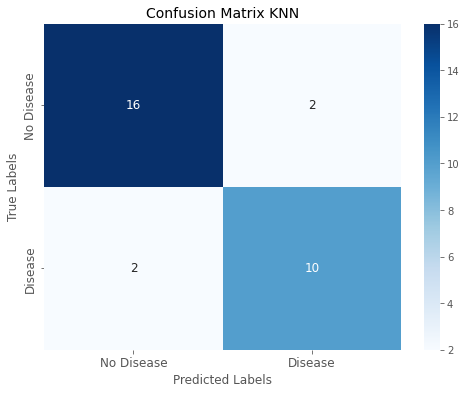

In [ ]:
plotting_confusion_matrix(knn, X_test_robust2, y_test_robust2, title='KNN')

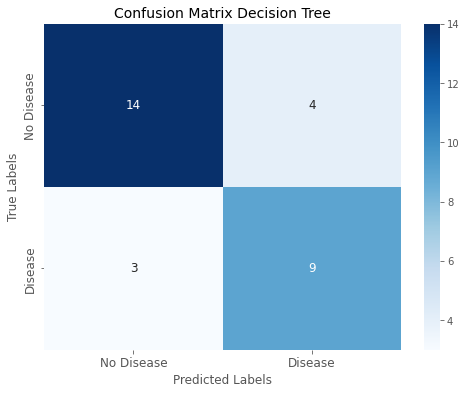

In [ ]:
plotting_confusion_matrix(dt, X_test_robust2, y_test_robust2, title='Decision Tree')

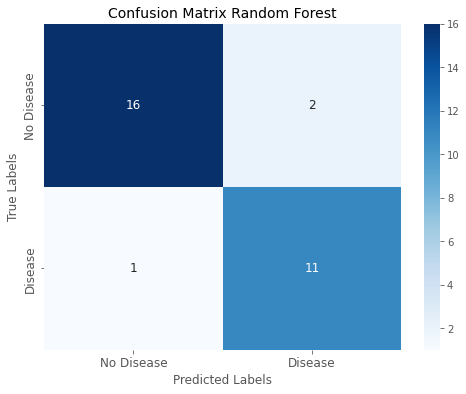

In [ ]:
plotting_confusion_matrix(rf, X_test_robust2, y_test_robust2, title='Random Forest')

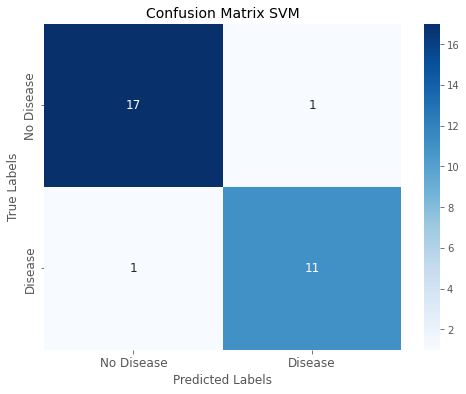

In [ ]:
plotting_confusion_matrix(svm, X_test_robust2, y_test_robust2, title='SVM')

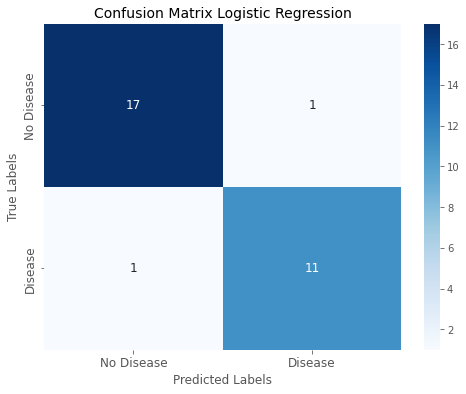

In [ ]:
plotting_confusion_matrix(lr, X_test_robust2, y_test_robust2, title='Logistic Regression')

#### Tuned Model

In [ ]:
# Hyperparameter tuning using Optuna

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_robust2, y_train_robust2)
    y_pred = knn.predict(X_test_robust2)
    return recall_score(y_test_robust2, y_pred)

def objective_dt(trial):
    max_depth = trial.suggest_int('max_depth', 1, 10)
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train_robust2, y_train_robust2)
    y_pred = dt.predict(X_test_robust2)
    return recall_score(y_test_robust2, y_pred)

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200, 10)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train_robust2, y_train_robust2)
    y_pred = rf.predict(X_test_robust2)
    return recall_score(y_test_robust2, y_pred)

def objective_svm(trial):
    C = trial.suggest_loguniform('C', 0.1, 10)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    svm = SVC(kernel='linear', C=C, gamma=gamma, random_state=42)
    svm.fit(X_train_robust2, y_train_robust2)
    y_pred = svm.predict(X_test_robust2)
    return recall_score(y_test_robust2, y_pred)

def objective_lr(trial):
    C = trial.suggest_loguniform('C', 0.1, 10)
    lr = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000, random_state=42)
    lr.fit(X_train_robust2, y_train_robust2)
    y_pred = lr.predict(X_test_robust2)
    return recall_score(y_test_robust2, y_pred)

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=100)

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=100)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=100)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100)

[I 2023-03-17 23:51:35,870] A new study created in memory with name: no-name-95a6a15d-040b-417e-8aac-92aac2d11552
[I 2023-03-17 23:51:35,888] Trial 0 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:51:35,903] Trial 1 finished with value: 0.75 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:51:35,917] Trial 2 finished with value: 0.75 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:51:35,931] Trial 3 finished with value: 0.6666666666666666 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:51:35,945] Trial 4 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 9}. Best is trial 0 with value: 0.8333333333333334.
[I 2023-03-17 23:51:35,958] Trial 5 finished with value: 0.5833333333333334 and parameters: {'n_neighbors': 2}. 

In [ ]:
# Train models using optimal hyperparameters

# KNN
knn_best = KNeighborsClassifier(n_neighbors=study_knn.best_params['n_neighbors'])
knn_best.fit(X_train_robust2, y_train_robust2)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Decision Tree
dt_best = DecisionTreeClassifier(max_depth=study_dt.best_params['max_depth'], random_state=42)
dt_best.fit(X_train_robust2, y_train_robust2)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# Random Forest
rf_best = RandomForestClassifier(n_estimators=study_rf.best_params['n_estimators'], max_depth=study_rf.best_params['max_depth'], random_state=42)
rf_best.fit(X_train_robust2, y_train_robust2)

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=42)

In [ ]:
# Support Vector Machine (SVM)
svm_best = SVC(kernel='linear', C=study_svm.best_params['C'], gamma=study_svm.best_params['gamma'], random_state=42)
svm_best.fit(X_train_robust2, y_train_robust2)

SVC(C=0.11298771858262625, kernel='linear', random_state=42)

In [ ]:
# Logistic Regression
lr_best = LogisticRegression(penalty='l2', C=study_lr.best_params['C'], solver='lbfgs', max_iter=1000, random_state=42)
lr_best.fit(X_train_robust2, y_train_robust2)

LogisticRegression(C=8.445307452616087, max_iter=1000, random_state=42)

In [ ]:
# Recall score for tuned models
models_best = [("K-Nearest Neighbor (KNN)", knn_best),
               ("Decision Tree", dt_best),
               ("Random Forest", rf_best),
               ("Support Vector Machine (SVM)", svm_best),
               ("Logistic Regression", lr_best)]

print("Recall score for tuned models:")
for name, model in models_best:
    y_pred = model.predict(X_test_robust2)
    score = recall_score(y_test_robust2, y_pred)
    model_number = models_best.index((name, model)) + 1
    print(f"Tuned Model {model_number}: {name:<30} - Recall score = {score:.3f}")

Recall score for tuned models:
Tuned Model 1: K-Nearest Neighbor (KNN)       - Recall score = 0.750
Tuned Model 2: Decision Tree                  - Recall score = 0.917
Tuned Model 3: Random Forest                  - Recall score = 0.833
Tuned Model 4: Support Vector Machine (SVM)   - Recall score = 0.750
Tuned Model 5: Logistic Regression            - Recall score = 0.833


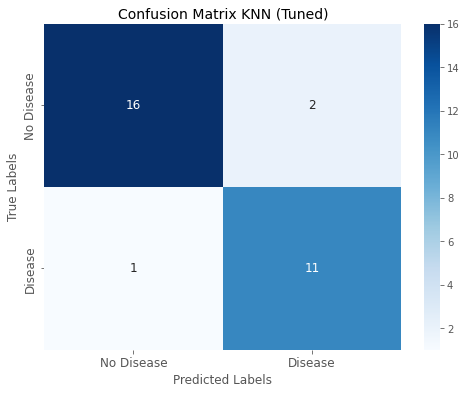

In [ ]:
plotting_confusion_matrix(knn_best, X_test_robust2, y_test_robust2, title='KNN (Tuned)')

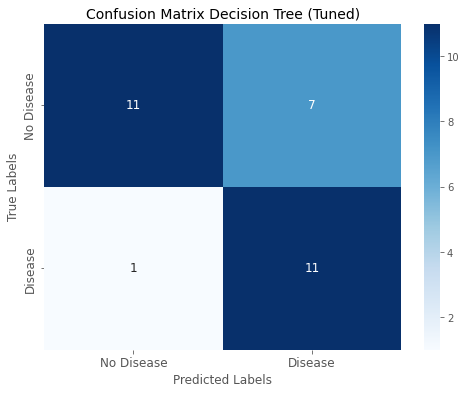

In [ ]:
plotting_confusion_matrix(dt_best, X_test_robust2, y_test_robust2, title='Decision Tree (Tuned)')

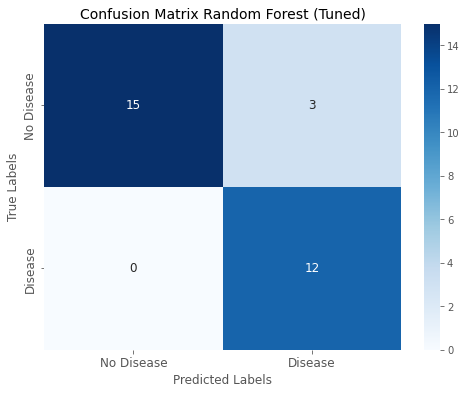

In [ ]:
plotting_confusion_matrix(rf_best, X_test_robust2, y_test_robust2, title='Random Forest (Tuned)')

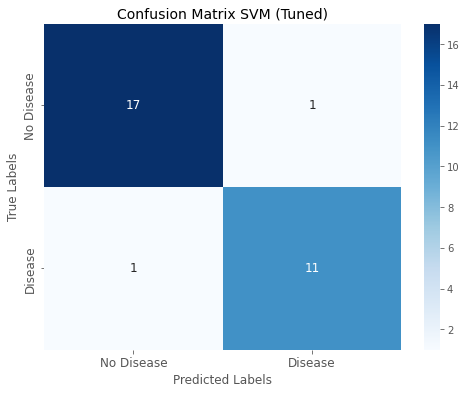

In [ ]:
plotting_confusion_matrix(svm_best, X_test_robust2, y_test_robust2, title='SVM (Tuned)')

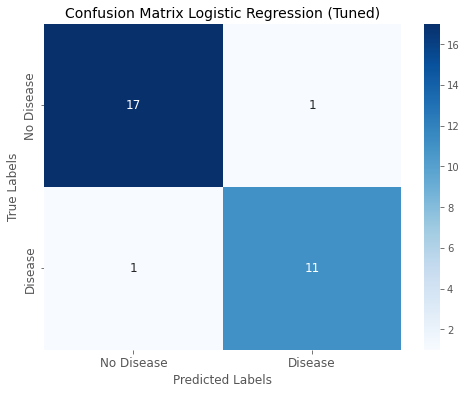

In [ ]:
plotting_confusion_matrix(lr_best, X_test_robust2, y_test_robust2, title='Logistic Regression (Tuned)')

#### Score for All Model

In [ ]:
# Function to compute recall score for all models
def score_all_classification(models, X_train, y_train, X_test, y_test):
    for i, (name, model) in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = recall_score(y_test, y_pred)
        print(f"{name:<30} - Recall score = {score:.3f}")

# Scoring all models
print("Base Models")
score_all_classification(models, X_train_robust2, y_train_robust2, X_test_robust2, y_test_robust2)
print("\nTuned Models")
score_all_classification(models_best, X_train_robust2, y_train_robust2, X_test_robust2, y_test_robust2)


Base Models
K-Nearest Neighbor (KNN)       - Recall score = 0.667
Decision Tree                  - Recall score = 0.833
Random Forest                  - Recall score = 0.750
Support Vector Machine (SVM)   - Recall score = 0.750
Logistic Regression            - Recall score = 0.750

Tuned Models
K-Nearest Neighbor (KNN)       - Recall score = 0.750
Decision Tree                  - Recall score = 0.917
Random Forest                  - Recall score = 0.833
Support Vector Machine (SVM)   - Recall score = 0.750
Logistic Regression            - Recall score = 0.833


In [ ]:
from sklearn.model_selection import cross_val_score

def evaluate_models(models, X, y, cv=5, scoring='recall'):
    for name, model in models:
        recall_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        print(f"{name:<30}: Mean Recall score = {recall_scores.mean():.3f}")

print("Base Models")
evaluate_models(models, X_train_robust2, y_train_robust2, cv=5, scoring='recall')
print("\nTuned Models")
evaluate_models(models_best, X_train_robust2, y_train_robust2, cv=5, scoring='recall')

Base Models
K-Nearest Neighbor (KNN)      : Mean Recall score = 0.720
Decision Tree                 : Mean Recall score = 0.656
Random Forest                 : Mean Recall score = 0.768
Support Vector Machine (SVM)  : Mean Recall score = 0.784
Logistic Regression           : Mean Recall score = 0.816

Tuned Models
K-Nearest Neighbor (KNN)      : Mean Recall score = 0.688
Decision Tree                 : Mean Recall score = 0.696
Random Forest                 : Mean Recall score = 0.752
Support Vector Machine (SVM)  : Mean Recall score = 0.768
Logistic Regression           : Mean Recall score = 0.792


#### Feature Importance

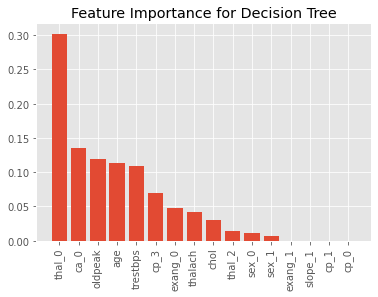

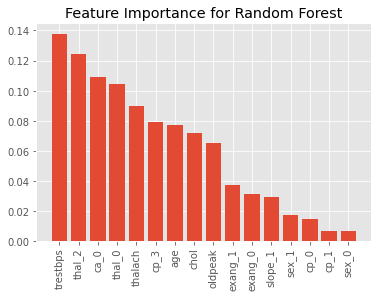

In [ ]:
# Decision Tree
dt_best.fit(X_train_robust2, y_train_robust2)
importances = dt_best.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_robust2.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance for Decision Tree")
plt.bar(range(X_train_robust2.shape[1]), importances[indices])
plt.xticks(range(X_train_robust2.shape[1]), names, rotation=90)
plt.show()

print()
# Random Forest
rf_best.fit(X_train_robust2, y_train_robust2)
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_robust2.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance for Random Forest")
plt.bar(range(X_train_robust2.shape[1]), importances[indices])
plt.xticks(range(X_train_robust2.shape[1]), names, rotation=90)
plt.show()

### Menggunakan MinMax Scaler

#### Base Model

In [ ]:
# K-Nearest Neighbor (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_mm2, y_train_mm2)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_mm2, y_train_mm2)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_mm2, y_train_mm2)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
svm.fit(X_train_mm2, y_train_mm2)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(X_train_mm2, y_train_mm2)

LogisticRegression(C=1, max_iter=1000, random_state=42)

In [ ]:
# Recall score for base models
models = [("K-Nearest Neighbor (KNN)", knn),
          ("Decision Tree", dt),
          ("Random Forest", rf),
          ("Support Vector Machine (SVM)", svm),
          ("Logistic Regression", lr)]

print("Recall Scores for Base Models:\n")
for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test_mm2)
    score = recall_score(y_test_mm2, y_pred)
    print(f"Model {i+1}: {name:<30} - Recall score = {score:.3f}")

Recall Scores for Base Models:

Model 1: K-Nearest Neighbor (KNN)       - Recall score = 0.667
Model 2: Decision Tree                  - Recall score = 0.733
Model 3: Random Forest                  - Recall score = 0.733
Model 4: Support Vector Machine (SVM)   - Recall score = 0.733
Model 5: Logistic Regression            - Recall score = 0.733


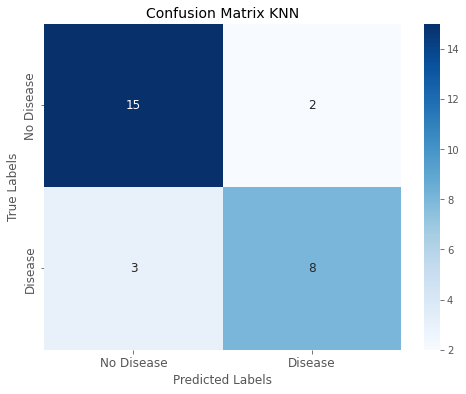

In [ ]:
plotting_confusion_matrix(knn, X_test_mm2, y_test_mm2, title='KNN')

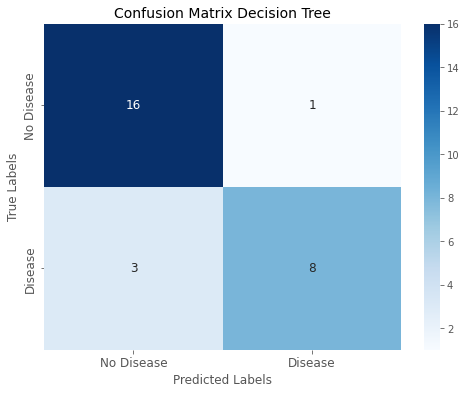

In [ ]:
plotting_confusion_matrix(dt, X_test_mm2, y_test_mm2, title='Decision Tree')

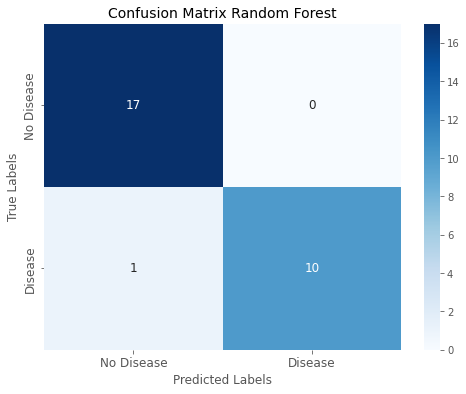

In [ ]:
plotting_confusion_matrix(rf, X_test_mm2, y_test_mm2, title='Random Forest')

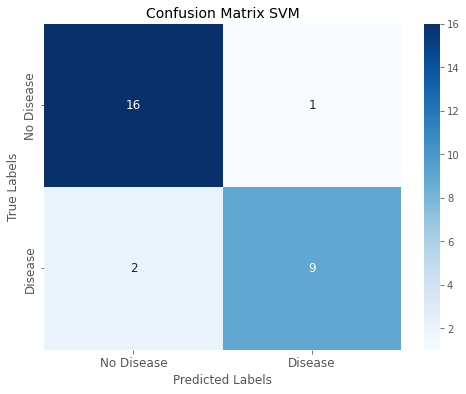

In [ ]:
plotting_confusion_matrix(svm, X_test_mm2, y_test_mm2, title='SVM')

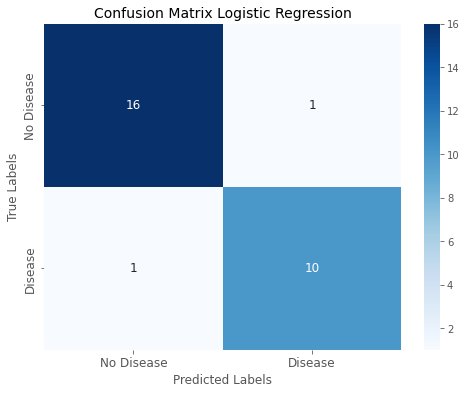

In [ ]:
plotting_confusion_matrix(lr, X_test_mm2, y_test_mm2, title='Logistic Regression')

#### Tuned Model

In [ ]:
# Hyperparameter tuning using Optuna

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_mm2, y_train_mm2)
    y_pred = knn.predict(X_test_mm2)
    return recall_score(y_test_mm2, y_pred)

def objective_dt(trial):
    max_depth = trial.suggest_int('max_depth', 1, 10)
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train_mm2, y_train_mm2)
    y_pred = dt.predict(X_test_mm2)
    return recall_score(y_test_mm2, y_pred)

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200, 10)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train_mm2, y_train_mm2)
    y_pred = rf.predict(X_test_mm2)
    return recall_score(y_test_mm2, y_pred)

def objective_svm(trial):
    C = trial.suggest_loguniform('C', 0.1, 10)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    svm = SVC(kernel='linear', C=C, gamma=gamma, random_state=42)
    svm.fit(X_train_mm2, y_train_mm2)
    y_pred = svm.predict(X_test_mm2)
    return recall_score(y_test_mm2, y_pred)

def objective_lr(trial):
    C = trial.suggest_loguniform('C', 0.1, 10)
    lr = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000, random_state=42)
    lr.fit(X_train_mm2, y_train_mm2)
    y_pred = lr.predict(X_test_mm2)
    return recall_score(y_test_mm2, y_pred)

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=100)

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=100)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=100)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100)

[I 2023-03-17 23:53:38,362] A new study created in memory with name: no-name-83eed693-a5c8-4823-b323-02a3cb08025d
[I 2023-03-17 23:53:38,379] Trial 0 finished with value: 0.7272727272727273 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.7272727272727273.
[I 2023-03-17 23:53:38,392] Trial 1 finished with value: 0.9090909090909091 and parameters: {'n_neighbors': 17}. Best is trial 1 with value: 0.9090909090909091.
[I 2023-03-17 23:53:38,406] Trial 2 finished with value: 0.8181818181818182 and parameters: {'n_neighbors': 15}. Best is trial 1 with value: 0.9090909090909091.
[I 2023-03-17 23:53:38,419] Trial 3 finished with value: 0.7272727272727273 and parameters: {'n_neighbors': 20}. Best is trial 1 with value: 0.9090909090909091.
[I 2023-03-17 23:53:38,433] Trial 4 finished with value: 0.7272727272727273 and parameters: {'n_neighbors': 12}. Best is trial 1 with value: 0.9090909090909091.
[I 2023-03-17 23:53:38,446] Trial 5 finished with value: 0.6363636363636364 and p

In [ ]:
# Train models using optimal hyperparameters

# KNN
knn_best = KNeighborsClassifier(n_neighbors=study_knn.best_params['n_neighbors'])
knn_best.fit(X_train_mm2, y_train_mm2)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
# Decision Tree
dt_best = DecisionTreeClassifier(max_depth=study_dt.best_params['max_depth'], random_state=42)
dt_best.fit(X_train_mm2, y_train_mm2)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# Random Forest
rf_best = RandomForestClassifier(n_estimators=study_rf.best_params['n_estimators'], max_depth=study_rf.best_params['max_depth'], random_state=42)
rf_best.fit(X_train_mm2, y_train_mm2)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
# Support Vector Machine (SVM)
svm_best = SVC(kernel='linear', C=study_svm.best_params['C'], gamma=study_svm.best_params['gamma'], random_state=42)
svm_best.fit(X_train_mm2, y_train_mm2)

SVC(C=2.521896874016523, gamma='auto', kernel='linear', random_state=42)

In [ ]:
# Logistic Regression
lr_best = LogisticRegression(penalty='l2', C=study_lr.best_params['C'], solver='lbfgs', max_iter=1000, random_state=42)
lr_best.fit(X_train_mm2, y_train_mm2)

LogisticRegression(C=0.16274037023005564, max_iter=1000, random_state=42)

In [ ]:
# Recall score for tuned models
models_best = [("K-Nearest Neighbor (KNN)", knn_best),
               ("Decision Tree", dt_best),
               ("Random Forest", rf_best),
               ("Support Vector Machine (SVM)", svm_best),
               ("Logistic Regression", lr_best)]

print("Recall score for tuned models:")
for name, model in models_best:
    y_pred = model.predict(X_test_mm2)
    score = recall_score(y_test_mm2, y_pred)
    model_number = models_best.index((name, model)) + 1
    print(f"Tuned Model {model_number}: {name:<30} - Recall score = {score:.3f}")

Recall score for tuned models:
Tuned Model 1: K-Nearest Neighbor (KNN)       - Recall score = 0.733
Tuned Model 2: Decision Tree                  - Recall score = 0.733
Tuned Model 3: Random Forest                  - Recall score = 0.800
Tuned Model 4: Support Vector Machine (SVM)   - Recall score = 0.733
Tuned Model 5: Logistic Regression            - Recall score = 0.733


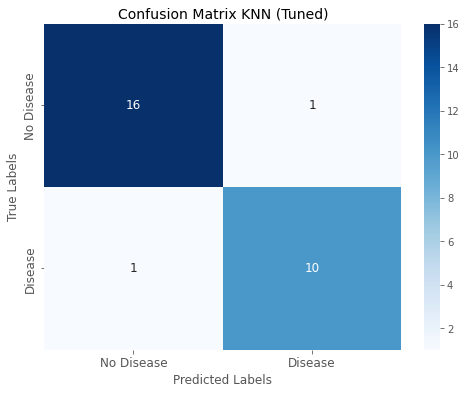

In [ ]:
plotting_confusion_matrix(knn_best, X_test_mm2, y_test_mm2, title='KNN (Tuned)')

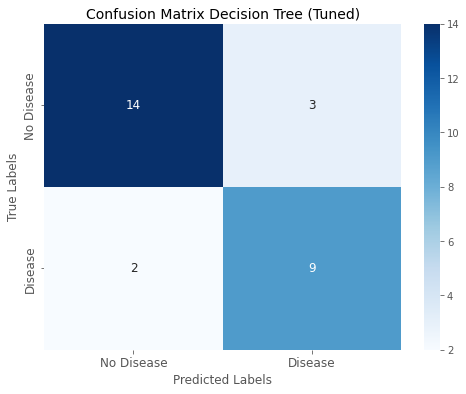

In [ ]:
plotting_confusion_matrix(dt_best, X_test_mm2, y_test_mm2, title='Decision Tree (Tuned)')

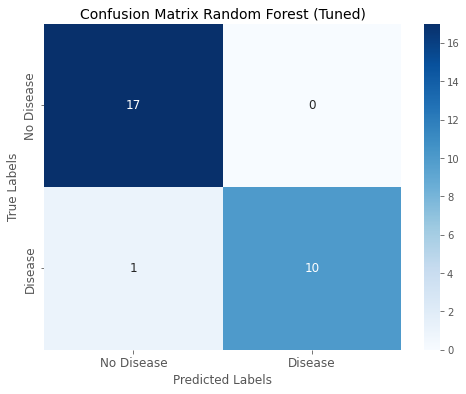

In [ ]:
plotting_confusion_matrix(rf_best, X_test_mm2, y_test_mm2, title='Random Forest (Tuned)')

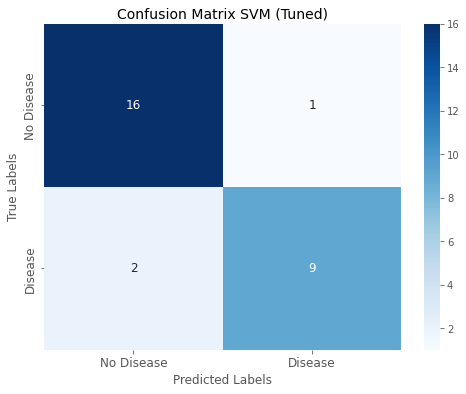

In [ ]:
plotting_confusion_matrix(svm_best, X_test_mm2, y_test_mm2, title='SVM (Tuned)')

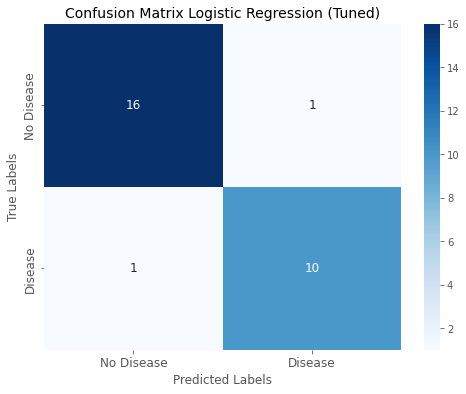

In [ ]:
plotting_confusion_matrix(lr_best, X_test_mm2, y_test_mm2, title='Logistic Regression (Tuned)')

#### Score for All Model

In [ ]:
# Function to compute recall score for all models
def score_all_classification(models, X_train, y_train, X_test, y_test):
    for i, (name, model) in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = recall_score(y_test, y_pred)
        print(f"{name:<30}: Recall score = {score:.3f}")

# Scoring all models
print("Base Models")
score_all_classification(models, X_train_mm2, y_train_mm2, X_test_mm2, y_test_mm2)
print("\nTuned Models")
score_all_classification(models_best, X_train_mm2, y_train_mm2, X_test_mm2, y_test_mm2)


Base Models
K-Nearest Neighbor (KNN)      : Recall score = 0.667
Decision Tree                 : Recall score = 0.733
Random Forest                 : Recall score = 0.733
Support Vector Machine (SVM)  : Recall score = 0.733
Logistic Regression           : Recall score = 0.733

Tuned Models
K-Nearest Neighbor (KNN)      : Recall score = 0.733
Decision Tree                 : Recall score = 0.733
Random Forest                 : Recall score = 0.800
Support Vector Machine (SVM)  : Recall score = 0.733
Logistic Regression           : Recall score = 0.733


In [ ]:
from sklearn.model_selection import cross_val_score

def evaluate_models(models, X, y, cv=5, scoring='recall'):
    for name, model in models:
        recall_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        print(f"{name:<30}: Mean Recall score = {recall_scores.mean():.3f}")

print("Base Models")
evaluate_models(models, X_train_mm2, y_train_mm2, cv=5, scoring='recall')
print("\nTuned Models")
evaluate_models(models_best, X_train_mm2, y_train_mm2, cv=5, scoring='recall')

Base Models
K-Nearest Neighbor (KNN)      : Mean Recall score = 0.761
Decision Tree                 : Mean Recall score = 0.715
Random Forest                 : Mean Recall score = 0.797
Support Vector Machine (SVM)  : Mean Recall score = 0.788
Logistic Regression           : Mean Recall score = 0.779

Tuned Models
K-Nearest Neighbor (KNN)      : Mean Recall score = 0.733
Decision Tree                 : Mean Recall score = 0.715
Random Forest                 : Mean Recall score = 0.788
Support Vector Machine (SVM)  : Mean Recall score = 0.779
Logistic Regression           : Mean Recall score = 0.779


#### Feature Importance

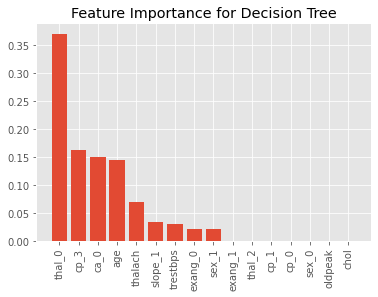

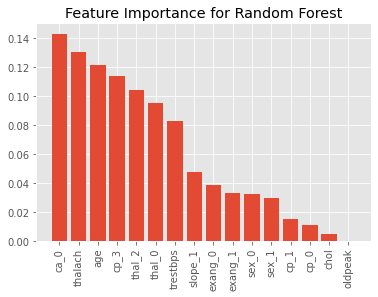

In [ ]:
# Decision Tree
dt_best.fit(X_train_mm2, y_train_mm2)
importances = dt_best.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_mm2.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance for Decision Tree")
plt.bar(range(X_train_mm2.shape[1]), importances[indices])
plt.xticks(range(X_train_mm2.shape[1]), names, rotation=90)
plt.show()

print()
# Random Forest
rf_best.fit(X_train_mm2, y_train_mm2)
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_mm2.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance for Random Forest")
plt.bar(range(X_train_mm2.shape[1]), importances[indices])
plt.xticks(range(X_train_mm2.shape[1]), names, rotation=90)
plt.show()

## **Modelling Conclusion**

1. Berdasarkan hasil dari serangkaian modelling yang telah dilakukan, pada data yang di transformasi menggunakan **Robust Scaler**, model yang memberikan hasil terbaik adalah base model **Logistic Regression** serta dilakukan feature selection dengan rata-rata Recall Score 0.816 atau **81.6%**. Sedangkan pada data yang di transformasi menggunakan **MinMax Scaler**, model yang memberikan hasil terbaik adalah **SVM** setelah dilakukan hyperparameter tuning menggunakan optuna dan tanpa dilakukan feature selection dengan rata-rata Recall Score 0.816 atau **81.6%**.

2. 5 Fitur terpenting menurut Random Forest dengan Robust Scaler adalah **thal, ca, age, cp, dan trestbps**. Sedangkan 5 fitur terpenting menurut Random Forest dengan MinMax Scaler adalah **ca, thal, age, thalach, dan trestbps**.

## **Kesimpulan**

1. Berdasarkan hasil analisis diatas, Karakter klinis yang menjadi faktor utama yang menyebabkan penyakit jantung berdasarkan fitur-fitur terpenting menurut Random Forest adalah **thalach, thal, age, ca, cp, dan trestbps**. Sehingga untuk mengetahui kemungkinan seseorang terkena penyakit jantung dapat dilihat dari kondisi-kondisi diatas.

2. Dari kelima model yang diuji menggunakan dua metode scaling yang berbeda, model Machine Learning yang mampu memberikan hasil prediksi terbaik adalah **Logistic Regression** menggunakan metode **Robust Scaler** dan dilakukan feature selection tanpa tuning dengan rata-rata Recall Score **81.6%** dan **SVM** menggunakan **MinMax Scaler** setelah dilakukan tuning tanpa feature selection dengan rata-rata Recall score **81.6%**